In [497]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        


'text/html'

'<style>.container { width:550% !important; }</style>'

In [498]:
df = pd.DataFrame()
df = pd.read_csv('03.WildRunner.joined_versenyadatok.csv', sep=';', encoding='utf-8')
df.head(5)

,when,place,division,who,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,...,placelabel,L_count,T_count,W_count,W_max,dogcl,wind_kphcl,temp_ccl,humcl,whenlabel
0,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20
1,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20
2,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20
3,16,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:24:51
4,16,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:24:51


In [499]:
# Konvertáljuk az 'szuletesi_datum' oszlopot dátumformátumba
#df = joined_df
#df['szuletesi_datum'] = pd.to_datetime(df['szuletesi_datum'])
#df['when'] = pd.to_datetime(df['when'])
#df.head(5)

In [500]:
# Alap statisztikák
#basic_stats = df.describe(include='all',datetime_is_numeric=True)
basic_stats = df.describe(include='all')
print('Alap statisztikák: ',basic_stats)

Alap statisztikák:                 when        place     division          who felvezeto     nev  \
count   3077.000000  3077.000000  3077.000000  3077.000000      3077    3077   
unique          NaN          NaN          NaN          NaN        50      50   
top             NaN          NaN          NaN          NaN  TU820403  Maggie   
freq            NaN          NaN          NaN          NaN       158     158   
mean     272.842054     3.494963     2.819305     3.069873       NaN     NaN   
std      196.214352     2.864925     2.448928     2.221334       NaN     NaN   
min        0.000000     0.000000     1.000000     0.000000       NaN     NaN   
25%       84.000000     1.000000     1.000000     1.000000       NaN     NaN   
50%      258.000000     3.000000     2.000000     4.000000       NaN     NaN   
75%      441.000000     6.000000     4.000000     5.000000       NaN     NaN   
max      640.000000     8.000000    13.000000     6.000000       NaN     NaN   

                faj

In [501]:
# summarize the number of unique values in each column
# if there were value 1 the column could be deleted :)
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

Column 'when' has 641 unique values.
Column 'place' has 9 unique values.
Column 'division' has 9 unique values.
Column 'who' has 7 unique values.
Column 'felvezeto' has 50 unique values.
Column 'nev' has 50 unique values.
Column 'fajta' has 15 unique values.
Column 'nem' has 2 unique values.
Column 'ivar' has 2 unique values.
Column 'szuletesi_datum' has 48 unique values.
Column 'chip_szam' has 50 unique values.
Column 'ulna_hossz' has 47 unique values.
Column 'ugrasi_magassag' has 7 unique values.
Column 'ivarlabel' has 2 unique values.
Column 'chip_szamlabel' has 50 unique values.
Column 'name' has 50 unique values.
Column 'running' has 4 unique values.
Column 'WLT' has 3 unique values.
Column 'dtime' has 356 unique values.
Column 'run' has 14 unique values.
Column 'withwho' has 68 unique values.
Column 'total' has 518 unique values.
Column 'hurdless' has 7 unique values.
Column 'colour' has 2 unique values.
Column 'dog' has 295 unique values.
Column 'start' has 273 unique values.
Co

In [502]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
#    count number of rows with missing values
#    n_miss = df[[i]].isnull().sum()
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 

__Csapat futási idők(total) gyakoriságai diviziók szerint__

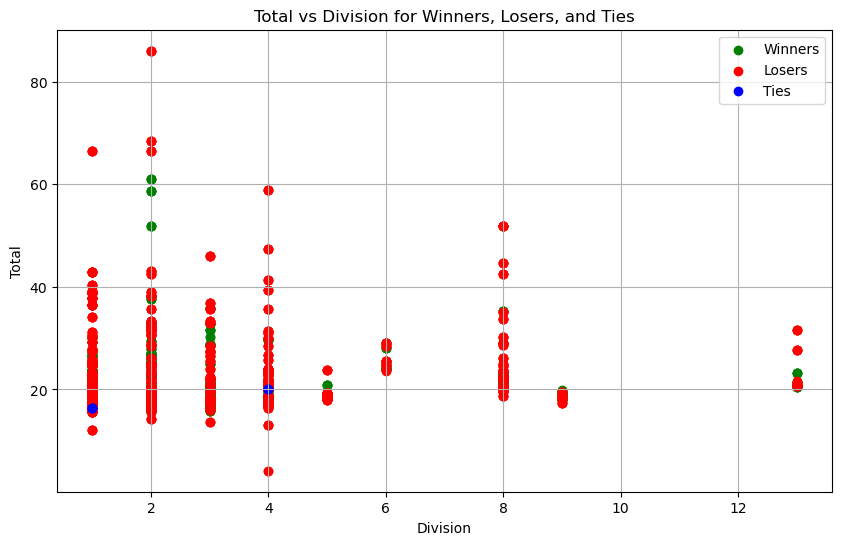

In [503]:
winners = df[df['WLTlabel'] == 'W']
losers = df[df['WLTlabel'] == 'L']
ties = df[df['WLTlabel'] == 'T']

plt.figure(figsize=(10, 6))

plt.scatter(winners['division'], winners['total'], color='green', label='Winners')
plt.scatter(losers['division'], losers['total'], color='red', label='Losers')
plt.scatter(ties['division'], ties['total'], color='blue', label='Ties')

plt.xlabel('Division')
plt.ylabel('Total')
plt.title('Total vs Division for Winners, Losers, and Ties')
plt.legend()

plt.grid(True)
plt.show()

__Csapat futási idők(total) átlaga diviziók szerint__  
__a győztesek futási ideje többnyire kisebb a vesztesékénél, kivétel: 6,9 divizió__

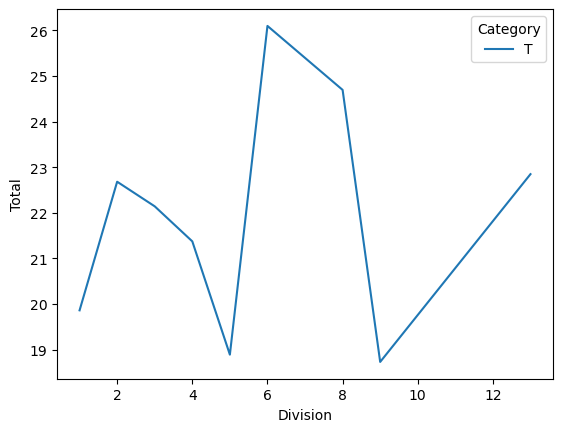

In [504]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["total"].mean().reset_index()
fig, ax = plt.subplots()
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["total"], label=category)
ax.set_xlabel("Division")
ax.set_ylabel("Total")
ax.legend(title="Category")
plt.show()

__Csapat futási idők(total) sűrűségfüggvénye__  
__a győztesek ritkábban futottak rossz időket mint a vesztesek__

C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


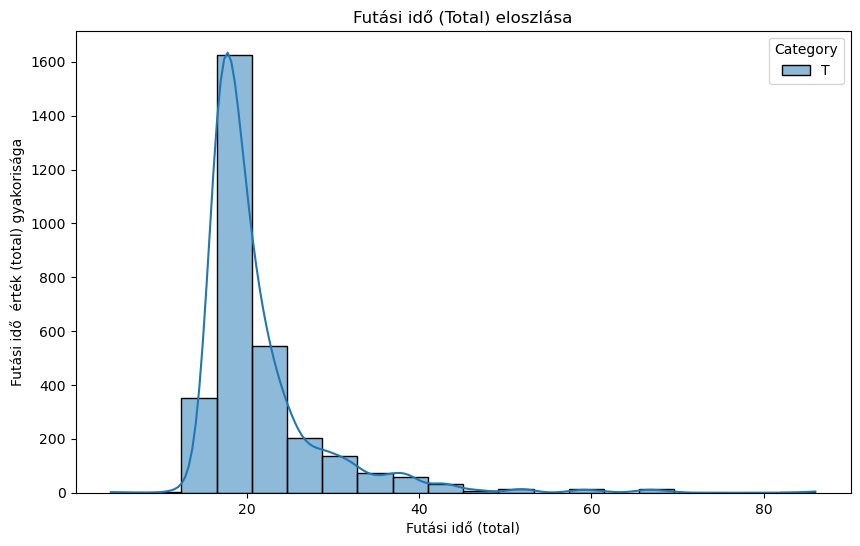

In [505]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))

# Futási idő értékek gyakorisága histogramban
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total', bins=20, kde=True, hue='Category')
plt.title('Futási idő (Total) eloszlása')
plt.xlabel('Futási idő (total)')
plt.ylabel('Futási idő  érték (total) gyakorisága')
plt.show()

__egyéni futási idők(dog) gyakoriságai diviziók szerint__

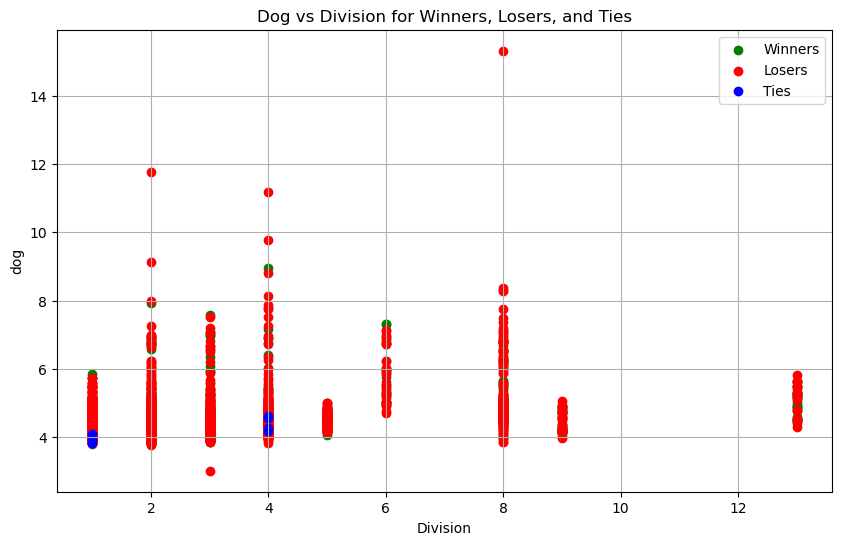

In [506]:
winners = df[df['WLTlabel'] == 'W']
losers = df[df['WLTlabel'] == 'L']
ties = df[df['WLTlabel'] == 'T']

plt.figure(figsize=(10, 6))

plt.scatter(winners['division'], winners['dog'], color='green', label='Winners')
plt.scatter(losers['division'], losers['dog'], color='red', label='Losers')
plt.scatter(ties['division'], ties['dog'], color='blue', label='Ties')

plt.xlabel('Division')
plt.ylabel('dog')
plt.title('Dog vs Division for Winners, Losers, and Ties')
plt.legend()

plt.grid(True)
plt.show()

__egyéni futási idők(dog) átlaga diviziók szerint__  
__a győztesek egyéni idejének átlaga többnyire jobb a vesztesékénél, kivétel: 6 divizió__

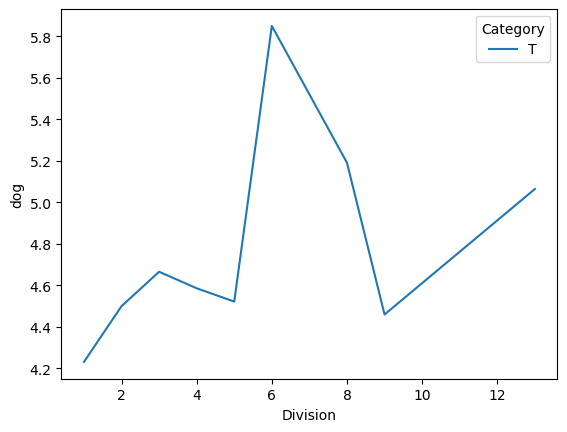

In [507]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["dog"].mean().reset_index()
fig, ax = plt.subplots()
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["dog"], label=category)
ax.set_xlabel("Division")
ax.set_ylabel("dog")
ax.legend(title="Category")
plt.show()

__egyéni  futási idők(dog) sűrüségfüggvénye__  
__a vesztesek gyakrabban futottak roszabb egyéni időket__

C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


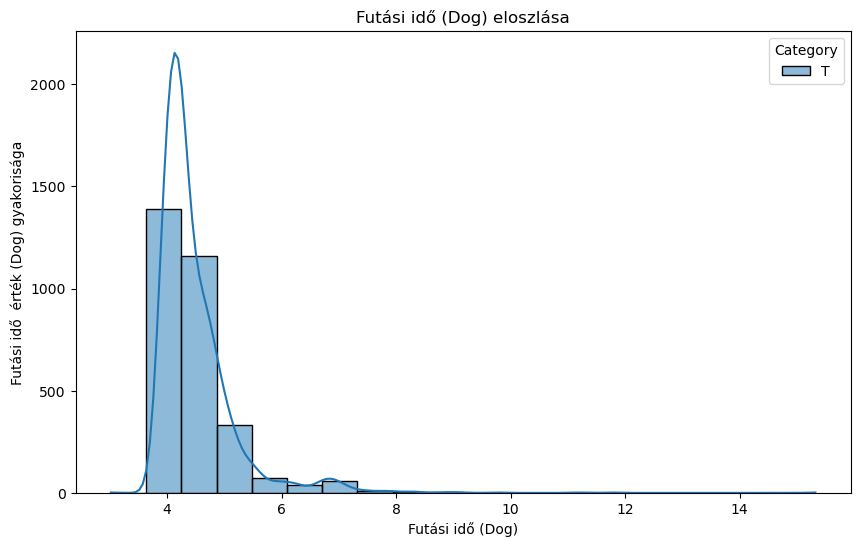

In [508]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))

# Futási idő értékek gyakorisága histogramban
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dog', bins=20, kde=True, hue='Category')
plt.title('Futási idő (Dog) eloszlása')
plt.xlabel('Futási idő (Dog)')
plt.ylabel('Futási idő  érték (Dog) gyakorisága')
plt.show()

__rajt idők(start) gyakoriságai diviziók szerint__  
__a győztesek start idői többnyire a vesztesek start időinél kisebbek__

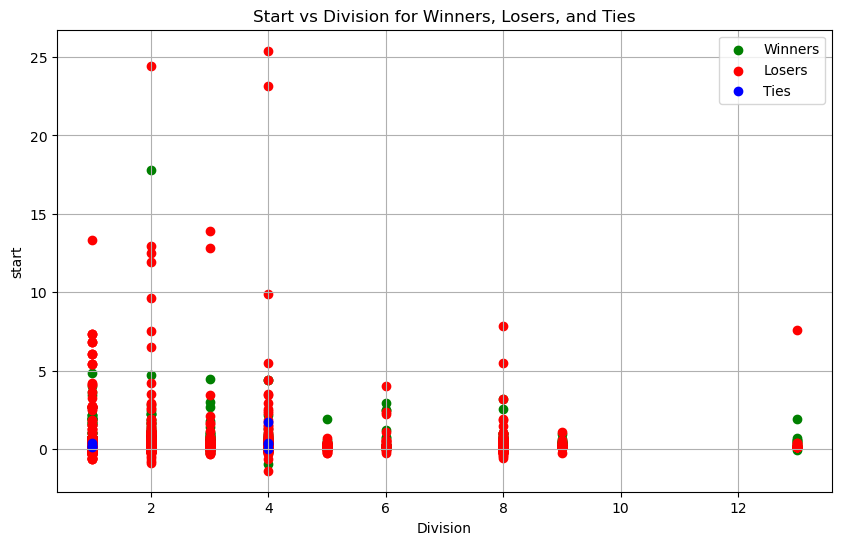

In [509]:
winners = df[df['WLTlabel'] == 'W']
losers = df[df['WLTlabel'] == 'L']
ties = df[df['WLTlabel'] == 'T']

plt.figure(figsize=(10, 6))

plt.scatter(winners['division'], winners['start'], color='green', label='Winners')
plt.scatter(losers['division'], losers['start'], color='red', label='Losers')
plt.scatter(ties['division'], ties['start'], color='blue', label='Ties')

plt.xlabel('Division')
plt.ylabel('start')
plt.title('Start vs Division for Winners, Losers, and Ties')
plt.legend()

plt.grid(True)
plt.show()

__Rajt idők(start) átlaga diviziók szerint__

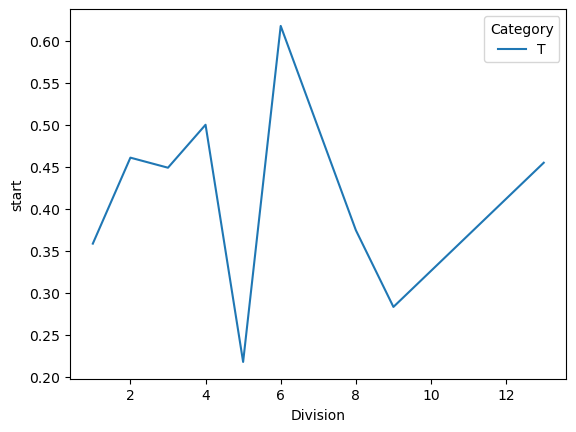

In [510]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["start"].mean().reset_index()
fig, ax = plt.subplots()
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["start"], label=category)
ax.set_xlabel("Division")
ax.set_ylabel("start")
ax.legend(title="Category")
plt.show()

__Rajt idők(start) sűrüségfüggvénye__

C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


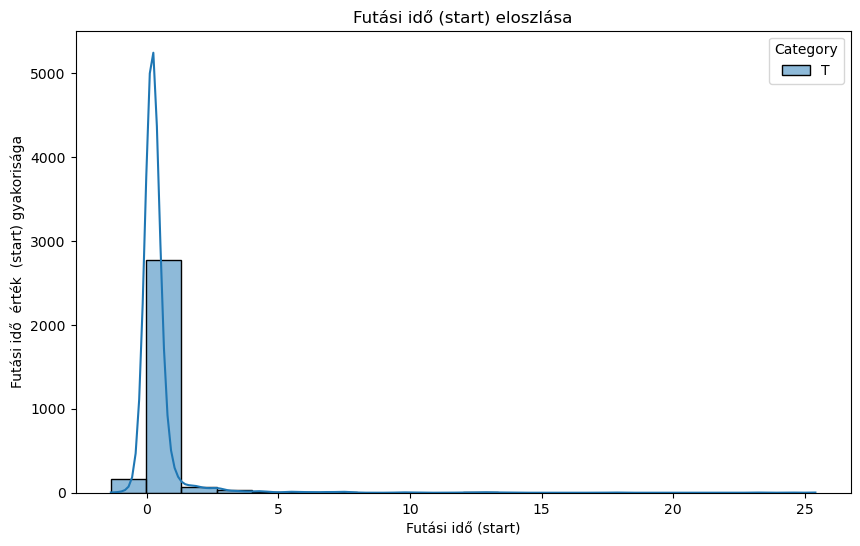

In [511]:
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))

# Futási idő értékek gyakorisága histogramban
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='start', bins=20, kde=True, hue='Category')
plt.title('Futási idő (start) eloszlása')
plt.xlabel('Futási idő (start)')
plt.ylabel('Futási idő  érték  (start) gyakorisága')
plt.show()

__Csapat futási idők maximumainak (total) sűrűségfüggvénye, divizió megadással__

C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


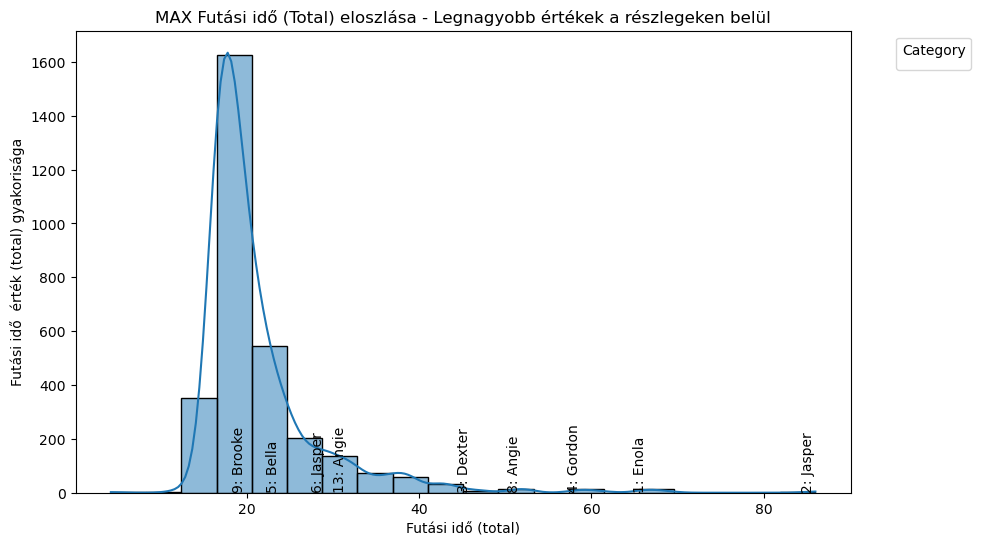

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'division' and find the row with the maximum 'total' within each group
max_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].idxmax()])

# Create histogram with multiple hues
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total', bins=20, kde=True, hue='Category')
plt.title('MAX Futási idő (Total) eloszlása - Legnagyobb értékek a részlegeken belül')
plt.xlabel('Futási idő (total)')
plt.ylabel('Futási idő  érték (total) gyakorisága')

# Add division and name of the row with the maximum 'total' within each division to the legend
for index, row in max_total_rows.iterrows():
    plt.text(row['total'], 0, f'{row["division"]}: {row["namelabel"]}', rotation=90, ha='right', va='bottom')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

__Csapat futási idők minimumainak (total) sűrűségfüggvénye, divizió megadással__

C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


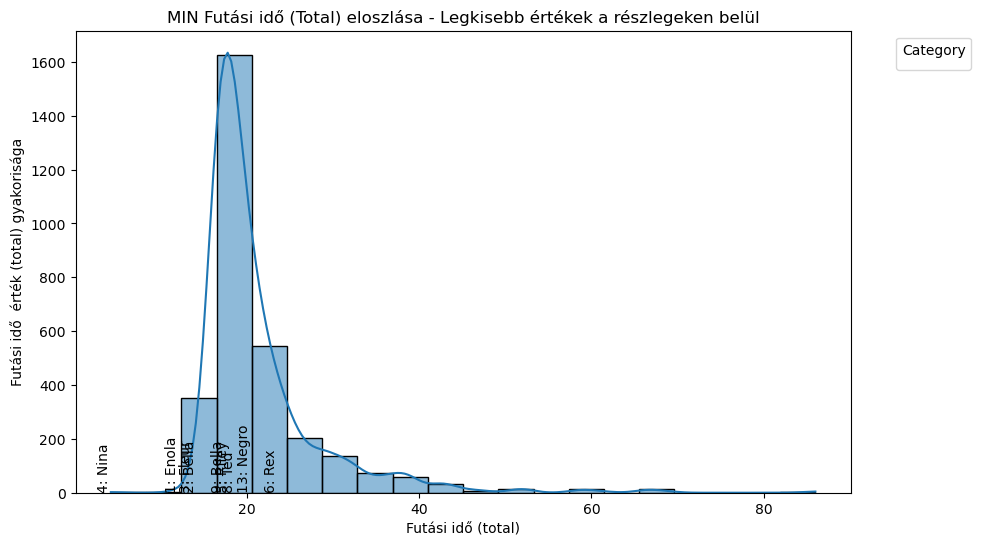

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'division' and find the row with the maximum 'total' within each group
max_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].idxmin()])

# Create histogram with multiple hues
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total', bins=20, kde=True, hue='Category', multiple='stack')
plt.title('MIN Futási idő (Total) eloszlása - Legkisebb értékek a részlegeken belül')
plt.xlabel('Futási idő (total)')
plt.ylabel('Futási idő  érték (total) gyakorisága')

# Add division and name of the row with the maximum 'total' within each division to the legend
for index, row in max_total_rows.iterrows():
    plt.text(row['total'], 0, f'{row["division"]}: {row["namelabel"]}', rotation=90, ha='right', va='bottom')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

__A leggyorsabb egyéni idő (dog) nem jelent csapatgyőzelmet is (kivétel 1,5 division)__

division:  1 W/L/T:  T name:  Enola min dog:  3.81 csapat:  WildRunners hopefuls
division:  2 W/L/T:  T name:  Cookies min dog:  3.76 csapat:  WildRunners dreamers
division:  3 W/L/T:  T name:  Punk min dog:  3.02 csapat:  WildRunners Wonders
division:  4 W/L/T:  T name:  Falco min dog:  3.83 csapat:  WildRunners Zephyr
division:  5 W/L/T:  T name:  Bree min dog:  4.06 csapat:  WildRunners Maximini
division:  6 W/L/T:  T name:  Rex min dog:  4.72 csapat:  WildRunners XXL
division:  8 W/L/T:  T name:  Cookies min dog:  3.87 csapat:  WildRunners Maximini
division:  9 W/L/T:  T name:  Brooke min dog:  3.99 csapat:  WildRunners Nightfall
division:  13 W/L/T:  T name:  Brix min dog:  4.29135971700199 csapat:  WildRunners Zephyr


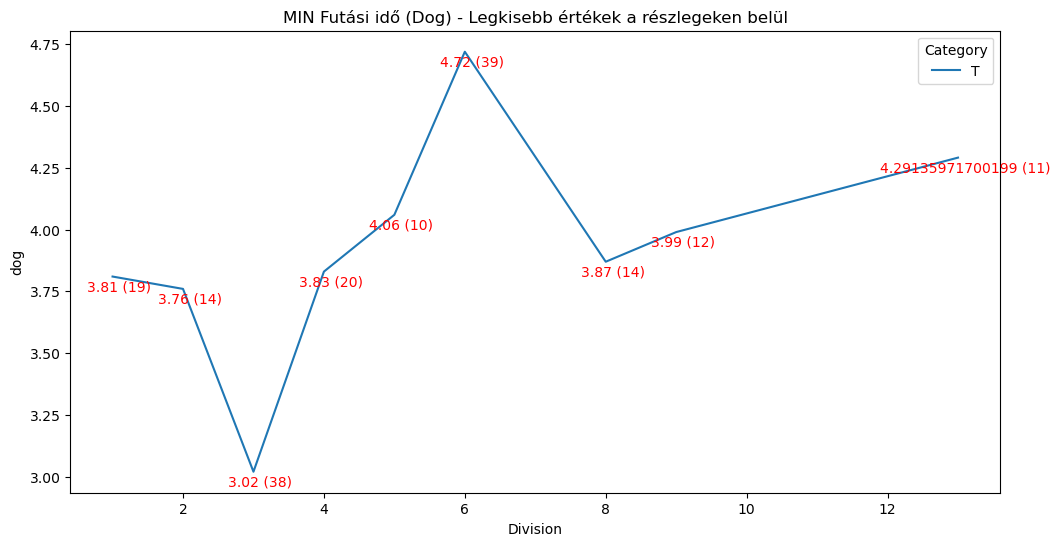

In [514]:
import seaborn as sns
import matplotlib.pyplot as plt



# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["dog"].min().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["dog"], label=category)
plt.title('MIN Futási idő (Dog) - Legkisebb értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("dog")
ax.legend(title="Category")


# Add minimal 'dog' value of the dog as annotation
min_dog_rows = df.groupby('division').apply(lambda x: x.loc[x['dog'].idxmin()])

for index, row in min_dog_rows.iterrows():
    min_dog_row = df[(df['division'] == row['division']) & (df['dog'] == row['dog'])].iloc[0]
    print("division: ",min_dog_row['division'],"W/L/T: ",min_dog_row['Category'],"name: ", min_dog_row["namelabel"],"min dog: ",min_dog_row["dog"],"csapat: ",min_dog_row["wholabel"])
    ax.annotate(f'{min_dog_row["dog"]} ({min_dog_row["name"]})',
                xy=(min_dog_row['division'], min_dog_row['dog']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')

plt.show()






__A leggyorsabb csapat idő (total) nem jelent csapatgyőzelmet (kivétel 5,13 division)__  
__A leggyorsabb csapat időhöz(total) képest negatív egyéni deltákkal rendelkező csapat általában kikapott,__  
__így győzött a 13-s divisionben a ritka győztes WildRunners Zephyr__

division:  1 W/L/T:  0 name:  Enola egyeni:  3.92 max total:  12.05 delta:  -0.91 csapat:  WildRunners hopefuls
division:  1 W/L/T:  0 name:  Maggie egyeni:  4.05 max total:  12.05 delta:  -1.04 csapat:  WildRunners hopefuls
division:  1 W/L/T:  0 name:  Tyna egyeni:  4.32 max total:  12.05 delta:  -1.3 csapat:  WildRunners hopefuls
division:  1 W/L/T:  0 name:  Moon egyeni:  3.95 max total:  12.05 delta:  -0.94 csapat:  WildRunners hopefuls
division:  2 W/L/T:  0 name:  Bella egyeni:  4.74 max total:  14.19 delta:  -1.19 csapat:  WildRunners Zephyr
division:  2 W/L/T:  0 name:  Ted egyeni:  4.32 max total:  14.19 delta:  -0.77 csapat:  WildRunners Zephyr
division:  2 W/L/T:  0 name:  Brix egyeni:  4.61 max total:  14.19 delta:  -1.06 csapat:  WildRunners Zephyr
division:  2 W/L/T:  0 name:  Mason egyeni:  4.61 max total:  14.19 delta:  -1.06 csapat:  WildRunners Zephyr
division:  3 W/L/T:  0 name:  Fleur egyeni:  4.33 max total:  13.73 delta:  -0.9 csapat:  WildRunners Maximini
divisi

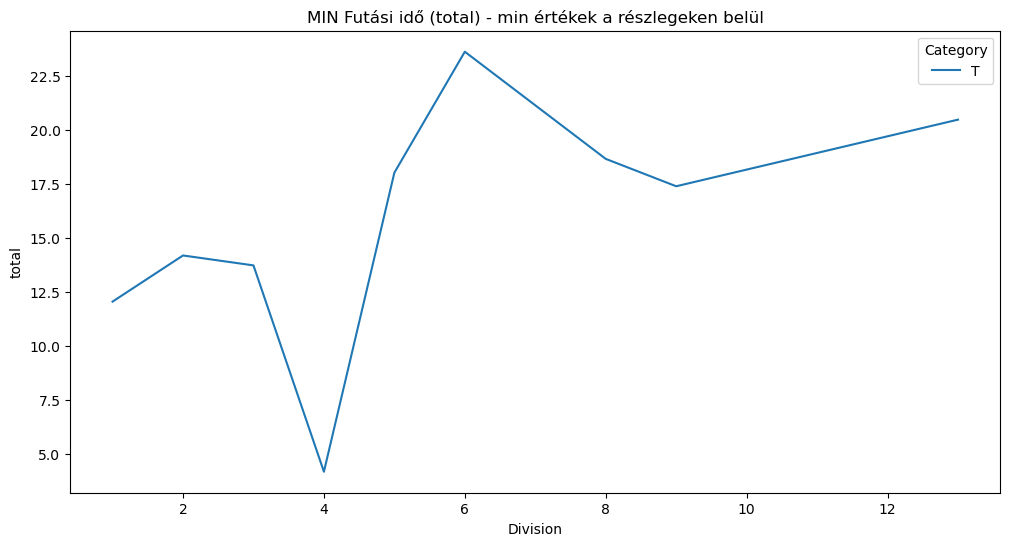

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt



# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["total"].min().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["total"], label=category)
plt.title('MIN Futási idő (total) - min értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("total")
ax.legend(title="Category")

average_total_mean = df.groupby('division')['total'].min()
# Add minimal 'total' value of the total as annotation
min_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].idxmin()])

for index, rowa in min_total_rows.iterrows():
#    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])].iloc[0]
    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])]    
#    print("division: ",min_total_row['division'],"W/L/T: ",min_total_row['Category'],"name: ", min_total_row["name"],"min total: ",min_total_row["total"],"csapat: ",min_total_row["who"])
    for i, row in min_total_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(average_total_mean[index]/4 - row["dog"],2),"csapat: ",row["wholabel"])

    
plt.show()

__A leggyorsabb start idő (start) általában csapatgyőzelmet is jelent (kivétel 3 division)__  
__A leggyorsabb csapat időhöz(start) képest negatív egyéni (start) deltákkal rendelkező csapat nem feltétlen vesztett__

division:  1 W/L/T:  2 name:  Bree egyeni:  4.39 max total:  17.35 delta:  -4.55 csapat:  WildRunners Maximini
division:  2 W/L/T:  2 name:  Nina egyeni:  4.05 max total:  17.72 delta:  -4.27 csapat:  WildRunners Nightfall
division:  3 W/L/T:  0 name:  Dexter egyeni:  4.37 max total:  22.34 delta:  -4.45 csapat:  WildRunners Wonders
division:  4 W/L/T:  0 name:  Fleur egyeni:  4.25 max total:  41.43 delta:  -4.59 csapat:  WildRunners Zephyr
division:  5 W/L/T:  2 name:  Gerry egyeni:  4.43 max total:  18.7 delta:  -4.48 csapat:  WildRunners Maximini
division:  6 W/L/T:  2 name:  Jessie egyeni:  5.02 max total:  24.28 delta:  -5.08 csapat:  WildRunners XXL
division:  8 W/L/T:  0 name:  Negro egyeni:  4.84 max total:  21.63 delta:  -4.98 csapat:  WildRunners XXL
division:  8 W/L/T:  2 name:  Negro egyeni:  4.93 max total:  35.3 delta:  -5.07 csapat:  WildRunners XXL
division:  8 W/L/T:  0 name:  Mason egyeni:  4.45 max total:  20.42 delta:  -4.6 csapat:  WildRunners Zephyr
division:  9 W

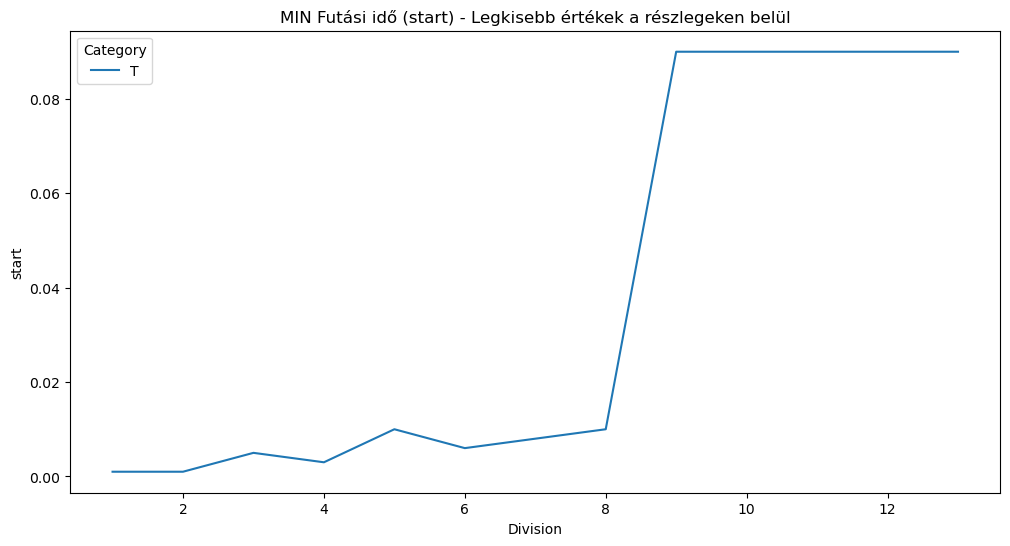

In [516]:
import seaborn as sns
import matplotlib.pyplot as plt



# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df[df['start'] > 0].groupby(["Category", "division"])["start"].min().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["start"], label=category)
plt.title('MIN Futási idő (start) - Legkisebb értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("start")
ax.legend(title="Category")


average_total_mean = df.groupby('division')['start'].min()
# Add minimal 'start' value of the start as annotation
#min_start_rows = df.groupby('division').apply(lambda x: x.loc[x['start'].idxmin()])
min_start_rows = df[df['start'] > 0].groupby('division').apply(lambda x: x.loc[x['start'].idxmin()])

for index, rowa in min_start_rows.iterrows():
#    min_start_row = df[(df['division'] == rowa['division']) & (df['start'] == rowa['start'])].iloc[0]  
    min_start_row = df[(df['division'] == rowa['division']) & (df['start'] == rowa['start'])  &  (df['start'] > 0)]
#    print("division: ",min_start_row['division'],"W/L/T: ",min_start_row['Category'],"name: ", min_start_row["name"],"min start: ",min_start_row["start"],"csapat: ",min_start_row["who"])
    for i, row in min_start_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(average_total_mean[index]/4 - row["dog"],2),"csapat: ",row["wholabel"])





plt.show()


__A leglassabb egyéni idő (dog) csapatvereséget jelent (kivétel 6,13 division)__  
__A leglassabb egyéni (dog) időkkel rendelkező WildRunners Zephyr általában kikapott (kivétel 5,6,13 division)__

division:  1 W/L/T:  T name:  Bruno max dog:  5.86 csapat:  WildRunners Zephyr
division:  2 W/L/T:  T name:  Angie max dog:  11.76 csapat:  WildRunners Zephyr
division:  3 W/L/T:  T name:  Gordon max dog:  7.59 csapat:  WildRunners Zephyr
division:  4 W/L/T:  T name:  Kesha max dog:  11.17 csapat:  WildRunners Zephyr
division:  5 W/L/T:  T name:  Kesha max dog:  5.01 csapat:  WildRunners Zephyr
division:  6 W/L/T:  T name:  Gordon max dog:  7.32 csapat:  WildRunners Zephyr
division:  8 W/L/T:  T name:  Kesha max dog:  15.32 csapat:  WildRunners Zephyr
division:  9 W/L/T:  T name:  Bree max dog:  5.06 csapat:  WildRunners Zephyr
division:  13 W/L/T:  T name:  Angie max dog:  5.81 csapat:  WildRunners Zephyr
division:  1 W/L/T:  2 name:  Bruno egyeni:  5.86 max total:  29.34 delta:  10.74 csapat:  WildRunners Maximini
division:  2 W/L/T:  0 name:  Angie egyeni:  11.76 max total:  86.03 delta:  9.75 csapat:  WildRunners XXL
division:  3 W/L/T:  2 name:  Gordon egyeni:  7.59 max total:  25

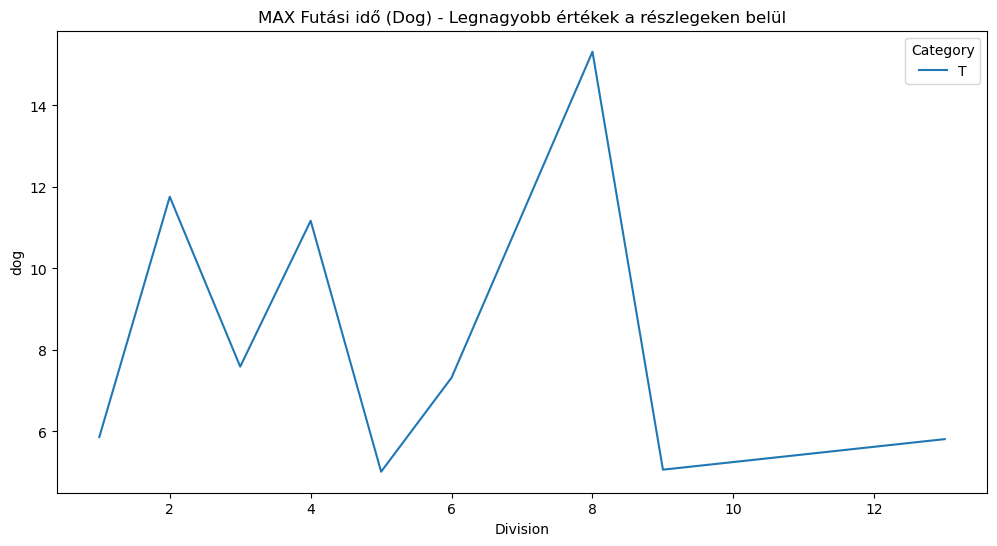

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt



# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["dog"].max().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["dog"], label=category)
plt.title('MAX Futási idő (Dog) - Legnagyobb értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("dog")
ax.legend(title="Category")

average_total_mean = df.groupby('division')['total'].max()
# Add maximal 'dog' value of the dog as annotation
max_dog_rows = df.groupby('division').apply(lambda x: x.loc[x['dog'].idxmax()])


for index, rowa in max_dog_rows.iterrows():
    max_dog_row = df[(df['division'] == rowa['division']) & (df['dog'] == rowa['dog'])].iloc[0]
    print("division: ",max_dog_row['division'],"W/L/T: ",max_dog_row['Category'],"name: ", max_dog_row["namelabel"],"max dog: ",max_dog_row["dog"],"csapat: ",min_dog_row["wholabel"])


for index, rowa in max_dog_rows.iterrows():
#    max_dog_row = df[(df['division'] == rowa['division']) & (df['dog'] == rowa['dog'])].iloc[0]
    max_dog_row = df[(df['division'] == rowa['division']) & (df['dog'] == rowa['dog'])]    
#    print("division: ",max_dog_row['division'],"W/L/T: ",max_dog_row['Category'],"name: ", max_dog_row["name"],"max dog: ",max_dog_row["dog"],"csapat: ",min_dog_row["who"])
    for i, row in max_dog_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(average_total_mean[index]/4 - row["dog"],2),"csapat: ",row["wholabel"])

    
    
    
    

plt.show()


__A leglassabb csapat idő (total) csapatvereséget is jelent (kivétel 6,9 division)__  
__A leglassabb egyéni (total) időkkel rendelkező csapat általában kikapott (kivétel 6,9 division)__

division:  1 W/L/T:  T name:  Enola min total:  66.41 csapat:  WildRunners hopefuls
division:  2 W/L/T:  T name:  Jasper min total:  86.03 csapat:  WildRunners XXL
division:  3 W/L/T:  T name:  Dexter min total:  46.0 csapat:  WildRunners Wonders
division:  4 W/L/T:  T name:  Gordon min total:  58.85 csapat:  WildRunners Zephyr
division:  5 W/L/T:  T name:  Bella min total:  23.83 csapat:  WildRunners Maximini
division:  6 W/L/T:  T name:  Jasper min total:  29.06 csapat:  WildRunners XXL
division:  8 W/L/T:  T name:  Angie min total:  51.82 csapat:  WildRunners Zephyr
division:  9 W/L/T:  T name:  Brooke min total:  19.83 csapat:  WildRunners Nightfall
division:  13 W/L/T:  T name:  Angie min total:  31.55 csapat:  WildRunners Zephyr
division:  1 W/L/T:  L name:  Enola egyeni:  3.96 max total:  66.41 delta:  12.64 csapat:  WildRunners hopefuls
division:  1 W/L/T:  L name:  Alfie egyeni:  4.06 max total:  66.41 delta:  12.54 csapat:  WildRunners hopefuls
division:  1 W/L/T:  L name:  F

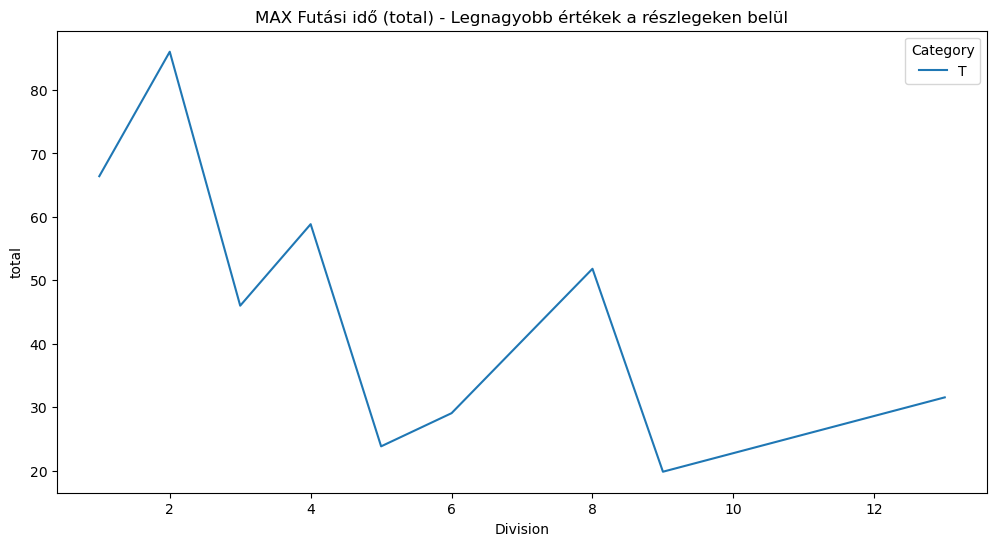

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt



# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["total"].max().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["total"], label=category)
plt.title('MAX Futási idő (total) - Legnagyobb értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("total")
ax.legend(title="Category")

average_total_mean = df.groupby('division')['total'].max()
# Add maximal 'total' value of the total as annotation
max_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].idxmax()])

for index, rowa in max_total_rows.iterrows():
    max_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])].iloc[0]
    print("division: ",max_total_row['division'],"W/L/T: ",max_total_row['Category'],"name: ", max_total_row["namelabel"],"min total: ",max_total_row["total"],"csapat: ",max_total_row["wholabel"])
    ax.annotate(f'{max_total_row["dog"]} ({max_total_row["name"]})',
                xy=(max_total_row['division'], max_total_row['dog']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')    
    
    
for index, rowa in max_total_rows.iterrows():
#    max_total_row = df[(df['division'] == row['division']) & (df['total'] == row['total'])].iloc[0]
    max_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])]
    for i, row in max_total_row.iterrows():
        print("division: ",row['division'],"W/L/T: ",row['WLTlabel'],"name: ", row["namelabel"],"egyeni: ",row["dog"],"max total: ",row["total"],"delta: ", round((average_total_mean[index]/4 - row["dog"]),2),"csapat: ",row["wholabel"])


plt.show()


__A leglassabb start idő (start) általában csapatvereséget is jelent (kivétel 5 division)__  
__A leglassabb egyéni  (start) időkkel rendelkező WildRunners Zephyr általában kikapott (kivétel 5 division)__

division:  1 W/L/T:  T name:  Alfie max start:  13.35 csapat:  WildRunners dreamers
division:  2 W/L/T:  T name:  Ted max start:  24.41 csapat:  WildRunners Zephyr
division:  3 W/L/T:  T name:  Bella max start:  13.91 csapat:  WildRunners Maximini
division:  4 W/L/T:  T name:  Rex max start:  25.4 csapat:  WildRunners Zephyr
division:  5 W/L/T:  T name:  Kesha max start:  1.91 csapat:  WildRunners Zephyr
division:  6 W/L/T:  T name:  Rex max start:  4.04 csapat:  WildRunners XXL
division:  8 W/L/T:  T name:  Speedy max start:  7.84 csapat:  WildRunners Zephyr
division:  9 W/L/T:  T name:  Henry max start:  1.11 csapat:  WildRunners Nightfall
division:  13 W/L/T:  T name:  Brix max start:  7.6 csapat:  WildRunners Zephyr
division:  1 W/L/T:  L name:  Alex egyeni:  4.24 max total:  30.26 delta:  2.28 csapat:  WildRunners dreamers
division:  1 W/L/T:  L name:  Alfie egyeni:  4.07 max total:  30.26 delta:  2.32 csapat:  WildRunners dreamers
division:  1 W/L/T:  L name:  Hector egyeni:  4.1

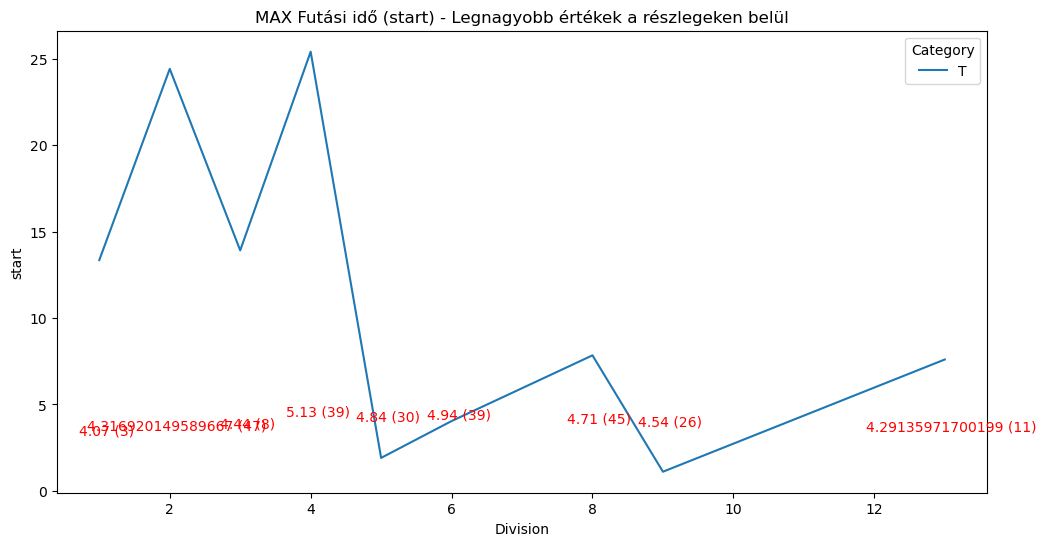

In [519]:
import seaborn as sns
import matplotlib.pyplot as plt

# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["start"].max().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["start"], label=category)
plt.title('MAX Futási idő (start) - Legnagyobb értékek a részlegeken belül')    
ax.set_xlabel("Division")
ax.set_ylabel("start")
ax.legend(title="Category")

average_total_mean = df.groupby('division')['start'].max()
# Add maximal 'start' value of the start as annotation
max_start_rows = df.groupby('division').apply(lambda x: x.loc[x['start'].idxmax()])


for index, row in max_start_rows.iterrows():
    max_start_row = df[(df['division'] == row['division']) & (df['start'] == row['start'])].iloc[0]
    print("division: ",max_start_row['division'],"W/L/T: ",max_start_row['Category'],"name: ", max_start_row["namelabel"],"max start: ",max_start_row["start"],"csapat: ",max_start_row["wholabel"])
    ax.annotate(f'{max_start_row["dog"]} ({max_start_row["name"]})',
                xy=(max_start_row['division'], max_start_row['dog']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')    
    
for index, rowa in max_start_rows.iterrows():
#    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])].iloc[0]
    max_start_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])]    
#    print("division: ",min_total_row['division'],"W/L/T: ",min_total_row['Category'],"name: ", min_total_row["name"],"min total: ",min_total_row["total"],"csapat: ",min_total_row["who"])
    for i, row in max_start_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLTlabel'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round((average_total_mean[index] - row["dog"])/4,2),"csapat: ",row["wholabel"])
    
    
    

plt.show()

__Az átlaghoz legközelebbi egyéni idő (dog) csapatgyőzelmet is jelent (kivétel 5 division)__   
__Az átlaghoz (dog) képest nagy negatív delták egy csapat számára vereséget jelentenek__

Az átlaghoz közeli dog (egyéni) értékek:
division:  1 W/L/T:  T name:  Ashley min dog:  4.23 csapat:  WildRunners Maximini
division:  2 W/L/T:  T name:  Sara min dog:  4.5 csapat:  WildRunners Nightfall
division:  3 W/L/T:  T name:  Bruno min dog:  4.66 csapat:  WildRunners XXL
division:  4 W/L/T:  T name:  Fleur min dog:  4.59 csapat:  WildRunners Nightfall
division:  5 W/L/T:  T name:  Bella min dog:  4.52 csapat:  WildRunners Maximini
division:  6 W/L/T:  T name:  Dusty min dog:  5.85 csapat:  WildRunners XXL
division:  8 W/L/T:  T name:  Speedy min dog:  5.19 csapat:  WildRunners Zephyr
division:  9 W/L/T:  T name:  Hector min dog:  4.51 csapat:  WildRunners Nightfall
division:  13 W/L/T:  T name:  Negro min dog:  5.09 csapat:  WildRunners Zephyr
Az átlaghoz közeli dog(egyéni) értéket elérők egyéni idejei:
division:  1 W/L/T:  2 name:  Ashley egyeni:  4.23 max total:  24.67 delta:  -0.89 csapat:  WildRunners Maximini
division:  1 W/L/T:  2 name:  Pax egyeni:  4.23 max total:  21.56

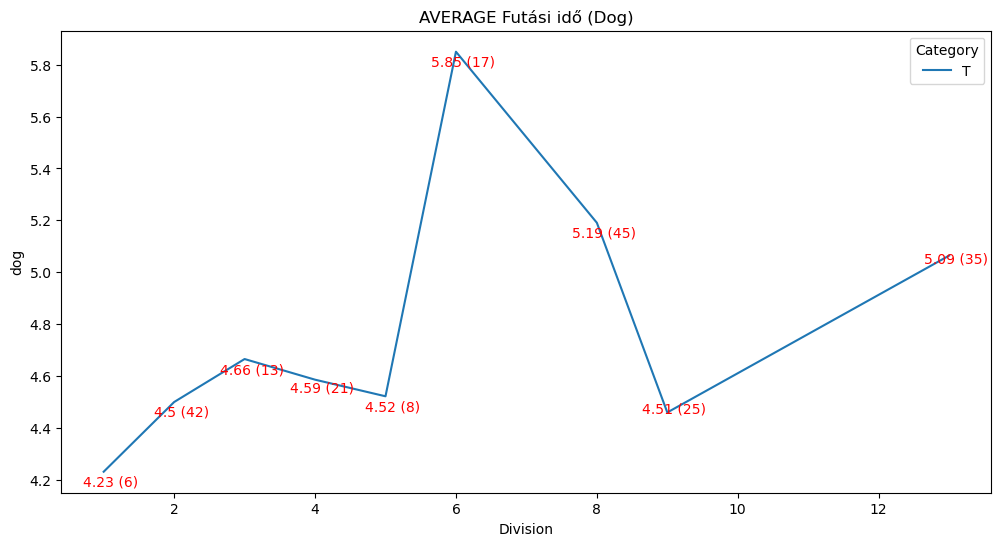

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to find the nearest dog value
def find_nearest_dog(row):
    division = row['division']
    mean_dog = row['dog']
    # Filter the original DataFrame to find the rows with the specified 'division'
    division_data = df[df['division'] == division]
    # Calculate the absolute difference between each 'dog' value and the mean
    division_data['dog_difference'] = abs(division_data['dog'] - mean_dog)
    # Find the row with the minimum difference
    nearest_dog_row = division_data.loc[division_data['dog_difference'].idxmin()]
    return nearest_dog_row


# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["dog"].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["dog"], label=category)
plt.title('AVERAGE Futási idő (Dog)')    
ax.set_xlabel("Division")
ax.set_ylabel("dog")
ax.legend(title="Category")


# Add averageimal 'dog' value of the dog as annotation
#average_dog_rows = df.groupby('division').apply(lambda x: x.loc[x['dog'].mean()])
average_dog_mean = df.groupby('division')['dog'].mean()
average_dog_rows = pd.DataFrame(average_dog_mean).reset_index()


# Add minimal 'dog' value of the dog as annotation
#min_dog_rows = df.groupby('division').apply(lambda x: x.loc[x['dog'].idxmin()])
min_dog_rows = average_dog_rows.apply(find_nearest_dog, axis=1)
print("Az átlaghoz közeli dog (egyéni) értékek:")
for index, row in min_dog_rows.iterrows():
    min_dog_row = df[(df['division'] == row['division']) & (df['dog'] == row['dog'])].iloc[0]
    print("division: ",min_dog_row['division'],"W/L/T: ",min_dog_row['Category'],"name: ", min_dog_row["namelabel"],"min dog: ",min_dog_row["dog"],"csapat: ",min_dog_row["wholabel"])

    ax.annotate(f'{min_dog_row["dog"]} ({min_dog_row["name"]})',
                xy=(min_dog_row['division'], min_dog_row['dog']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')    
    
print("Az átlaghoz közeli dog(egyéni) értéket elérők egyéni idejei:")    
for index, rowa in min_dog_rows.iterrows():
#    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])].iloc[0]
    min_dog_row = df[(df['division'] == rowa['division']) & (df['dog'] == rowa['dog'])]    
#    print("division: ",min_total_row['division'],"W/L/T: ",min_total_row['Category'],"name: ", min_total_row["name"],"min total: ",min_total_row["total"],"csapat: ",min_total_row["who"])
    for i, row in min_dog_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(average_total_mean.iloc[index]/4-row["dog"],2),"csapat: ",row["wholabel"])
    
    
    

plt.show()



__Az átlaghoz legközelebbi csapat idő (total) csapatgyőzelmet is jelent (kivétel 6,9 division)__   
__Az átlaghoz (total) képest nagy negatív delták egy csapat számára vereséget jelentenek__

Az átlaghoz közeli total értékek:
division:  1 W/L/T:  T name:  Bella min total:  19.96 csapat:  0
division:  2 W/L/T:  T name:  Sara min total:  22.67 csapat:  0
division:  3 W/L/T:  T name:  Dexter min total:  22.01 csapat:  2
division:  4 W/L/T:  T name:  Bailey min total:  21.38 csapat:  4
division:  5 W/L/T:  T name:  Bella min total:  18.92 csapat:  0
division:  6 W/L/T:  T name:  Rex min total:  25.52 csapat:  3
division:  8 W/L/T:  T name:  Gordon min total:  24.65 csapat:  3
division:  9 W/L/T:  T name:  Bella min total:  18.8 csapat:  1
division:  13 W/L/T:  T name:  Negro min total:  23.21 csapat:  4
Az átlaghoz közeli total értéket elérők egyéni idejei:
division:  1 W/L/T:  W name:  Bella egyeni:  4.67 max total:  19.96 delta:  0.3 csapat:  WildRunners Maximini
division:  1 W/L/T:  W name:  Bruno egyeni:  4.5 max total:  19.96 delta:  0.47 csapat:  WildRunners Maximini
division:  1 W/L/T:  W name:  Rocky egyeni:  4.96 max total:  19.96 delta:  0.01 csapat:  WildRunners Maxi

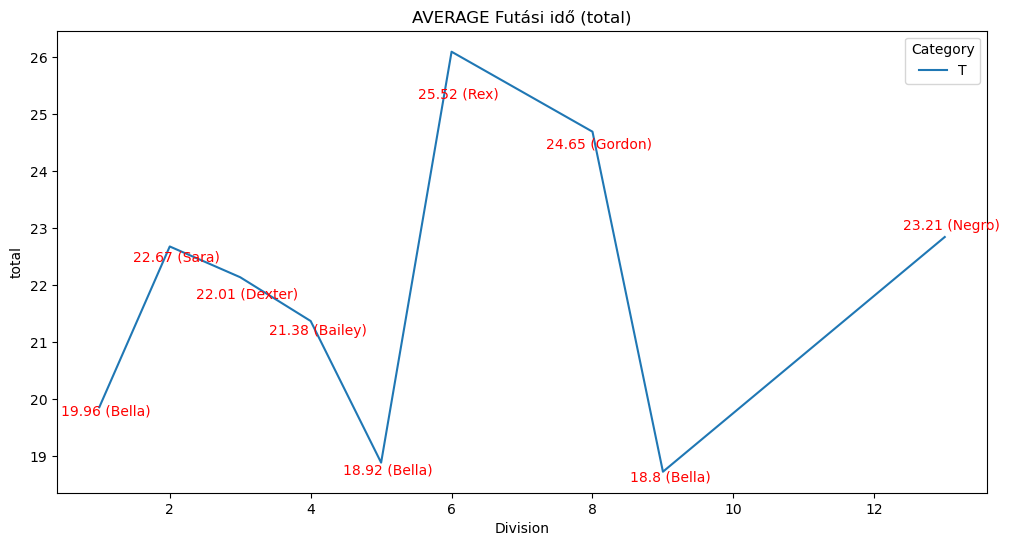

In [521]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to find the nearest total value
def find_nearest_total(row):
    division = row['division']
    mean_total = row['total']
    # Filter the original DataFrame to find the rows with the specified 'division'
    division_data = df[df['division'] == division]
    # Calculate the absolute difference between each 'total' value and the mean
    division_data['total_difference'] = abs(division_data['total'] - mean_total)
    # Find the row with the minimum difference
    nearest_total_row = division_data.loc[division_data['total_difference'].idxmin()]
    return nearest_total_row


# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df.groupby(["Category", "division"])["total"].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["total"], label=category)
plt.title('AVERAGE Futási idő (total)')    
ax.set_xlabel("Division")
ax.set_ylabel("total")
ax.legend(title="Category")


# Add averageimal 'total' value of the total as annotation
#average_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].mean()])
average_total_mean = df.groupby('division')['total'].mean()
average_total_rows = pd.DataFrame(average_total_mean).reset_index()


# Add minimal 'total' value of the total as annotation
#min_total_rows = df.groupby('division').apply(lambda x: x.loc[x['total'].idxmin()])
min_total_rows = average_total_rows.apply(find_nearest_total, axis=1)
print("Az átlaghoz közeli total értékek:")
for index, row in min_total_rows.iterrows():
    min_total_row = df[(df['division'] == row['division']) & (df['total'] == row['total'])].iloc[0]
    print("division: ",min_total_row['division'],"W/L/T: ",min_total_row['Category'],"name: ", min_total_row["namelabel"],"min total: ",min_total_row["total"],"csapat: ",min_total_row["who"])
    ax.annotate(f'{min_total_row["total"]} ({min_total_row["namelabel"]})',
                xy=(min_total_row['division'], min_total_row['total']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')

print("Az átlaghoz közeli total értéket elérők egyéni idejei:")    
for index, rowa in min_total_rows.iterrows():
#    min_total_row = df[(df['division'] == row['division']) & (df['total'] == row['total'])].iloc[0]
    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])]
    for i, row in min_total_row.iterrows():
        print("division: ",row['division'],"W/L/T: ",row['WLTlabel'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round((average_total_mean.iloc[index]/4)-row["dog"],2),"csapat: ",row["wholabel"])
    

    
    
plt.show()





__Az átlaghoz legközelebbi csapat start(start) csapatgyőzelmet jelent (kivétel 6,9 division)__  

Az átlaghoz közeli start értékek:
division:  1 W/L/T:  T name:  Hector min start:  0.4 csapat:  WildRunners dreamers
division:  2 W/L/T:  T name:  Ashley min start:  0.5 csapat:  WildRunners Maximini
division:  3 W/L/T:  T name:  Bree min start:  0.49 csapat:  WildRunners Maximini
division:  4 W/L/T:  T name:  Bailey min start:  0.55 csapat:  WildRunners Zephyr
division:  5 W/L/T:  T name:  Alex min start:  0.24 csapat:  WildRunners Zephyr
division:  6 W/L/T:  T name:  Abby min start:  0.71 csapat:  WildRunners XXL
division:  8 W/L/T:  T name:  Hank min start:  0.44 csapat:  WildRunners Zephyr
division:  9 W/L/T:  T name:  Hector min start:  0.29 csapat:  WildRunners Nightfall
division:  13 W/L/T:  T name:  Angie min start:  0.48 csapat:  WildRunners Zephyr
Az átlaghoz közeli start értéket elérők egyéni idejei:
division:  1 W/L/T:  L name:  Hector egyeni:  4.21 max total:  18.07 delta:  -4.11 csapat:  WildRunners dreamers
division:  1 W/L/T:  L name:  Bonnie egyeni:  4.08 max total:  2

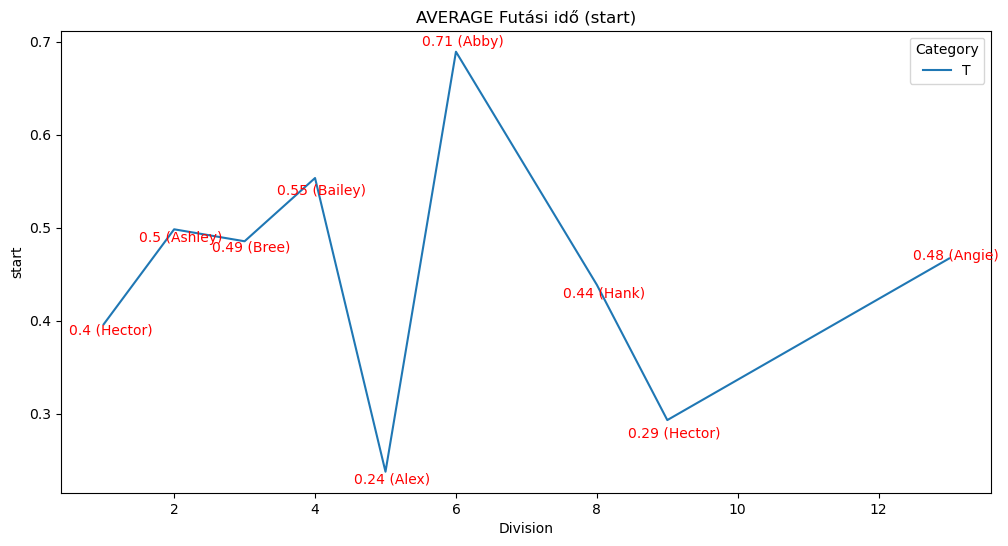

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to find the nearest start value
def find_nearest_start(row):
    division = row['division']
    mean_start = row['start']
    # Filter the original DataFrame to find the rows with the specified 'division'
    division_data = df[df['division'] == division]
    # Calculate the absolute difference between each 'start' value and the mean
    division_data['start_difference'] = abs(division_data['start'] - mean_start)
    # Find the row with the minimum difference
    nearest_start_row = division_data.loc[division_data['start_difference'].idxmin()]
    return nearest_start_row


# Code to create line plot with different categories
df["Category"] = df.iloc[:, 26].apply(lambda x: "W" if x == "W" else ("L" if x == "L" else "T"))
grouped_data = df[df['start'] > 0].groupby(["Category", "division"])["start"].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width and height as needed
for category, data in grouped_data.groupby("Category"):
    ax.plot(data["division"], data["start"], label=category)
plt.title('AVERAGE Futási idő (start)')    
ax.set_xlabel("Division")
ax.set_ylabel("start")
ax.legend(title="Category")


# Add averageimal 'start' value of the start as annotation
#average_start_rows = df.groupby('division').apply(lambda x: x.loc[x['start'].mean()])
average_start_mean = df[df['start'] > 0].groupby('division')['start'].mean()
average_start_rows = pd.DataFrame(average_start_mean).reset_index()


# Add minimal 'start' value of the start as annotation
#min_start_rows = df.groupby('division').apply(lambda x: x.loc[x['start'].idxmin()])
#min DELTA start rows:
min_start_rows = average_start_rows.apply(find_nearest_start, axis=1)

print("Az átlaghoz közeli start értékek:")
for index, row in min_start_rows.iterrows():
    min_start_row = df[(df['division'] == row['division']) & (df['start'] == row['start'])  &  (df['start'] > 0)].iloc[0]
    print("division: ",min_start_row['division'],"W/L/T: ",min_start_row['Category'],"name: ", min_start_row["namelabel"],"min start: ",min_start_row["start"],"csapat: ",min_start_row["wholabel"])
    ax.annotate(f'{min_start_row["start"]} ({min_start_row["namelabel"]})',
                xy=(min_start_row['division'], min_start_row['start']),
                xytext=(5, -10),
                textcoords='offset points',
                ha='center',
                color='red')
print("Az átlaghoz közeli start értéket elérők egyéni idejei:")
for index, rowa in min_start_rows.iterrows():
#    min_total_row = df[(df['division'] == rowa['division']) & (df['total'] == rowa['total'])].iloc[0]
    min_start_row = df[(df['division'] == rowa['division']) & (df['start'] == rowa['start'])  &  (df['start'] > 0)]    
#    print("division: ",min_total_row['division'],"W/L/T: ",min_total_row['Category'],"name: ", min_total_row["name"],"min total: ",min_total_row["total"],"csapat: ",min_total_row["who"])
    for i, row in min_start_row.iterrows():
#        print("division: ",row['division'],"W/L/T: ",row['WLT'],"name: ", row["name"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_total_mean.iloc[index])/4)-row["dog"],2),"csapat: ",row["who"])
        print("division: ",row['division'],"W/L/T: ",row['WLTlabel'],"name: ", row["namelabel"],"egyeni: ",round(row["dog"],2),"max total: ",row["total"],"delta: ", round(((average_start_rows.iloc[index,1])/4)-row["dog"],2),"csapat: ",row["wholabel"])


plt.show()



__A hibaelőfordulások az eddig mindíg kivételnek számító 5,6,9,13 divizióban a legkisebbek__  
__kevesebb hiba, jobb esély a gyözelemre__  
__W: 2, L:0, T:1__

<Figure size 2000x600 with 0 Axes>

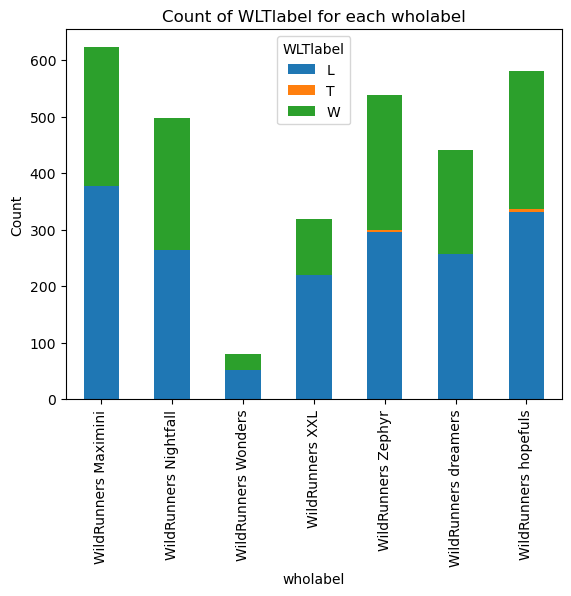

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by 'wholabel' and 'WLTlabel', and count occurrences
counts = df.groupby(['wholabel', 'WLTlabel']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
# Plot the counts
counts.plot(kind='bar', stacked=True)
plt.xlabel('wholabel')
plt.ylabel('Count')
plt.title('Count of WLTlabel for each wholabel')
plt.legend(title='WLTlabel')
plt.show()



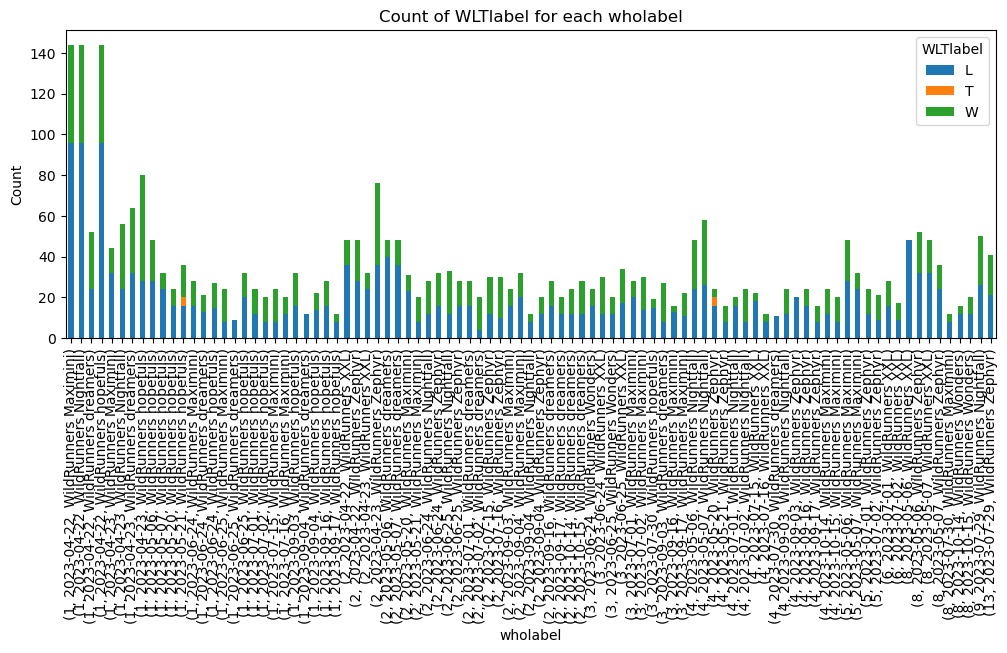

In [524]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by 'wholabel' and 'WLTlabel', and count occurrences
counts = df.groupby(['division','datumlabel','wholabel', 'WLTlabel']).size().unstack(fill_value=0)

# Plot the counts
counts.plot(kind='bar', stacked=True,figsize = (12,4))
plt.xlabel('wholabel')
plt.ylabel('Count')
plt.title('Count of WLTlabel for each wholabel')
plt.legend(title='WLTlabel')
plt.show()


C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zertr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


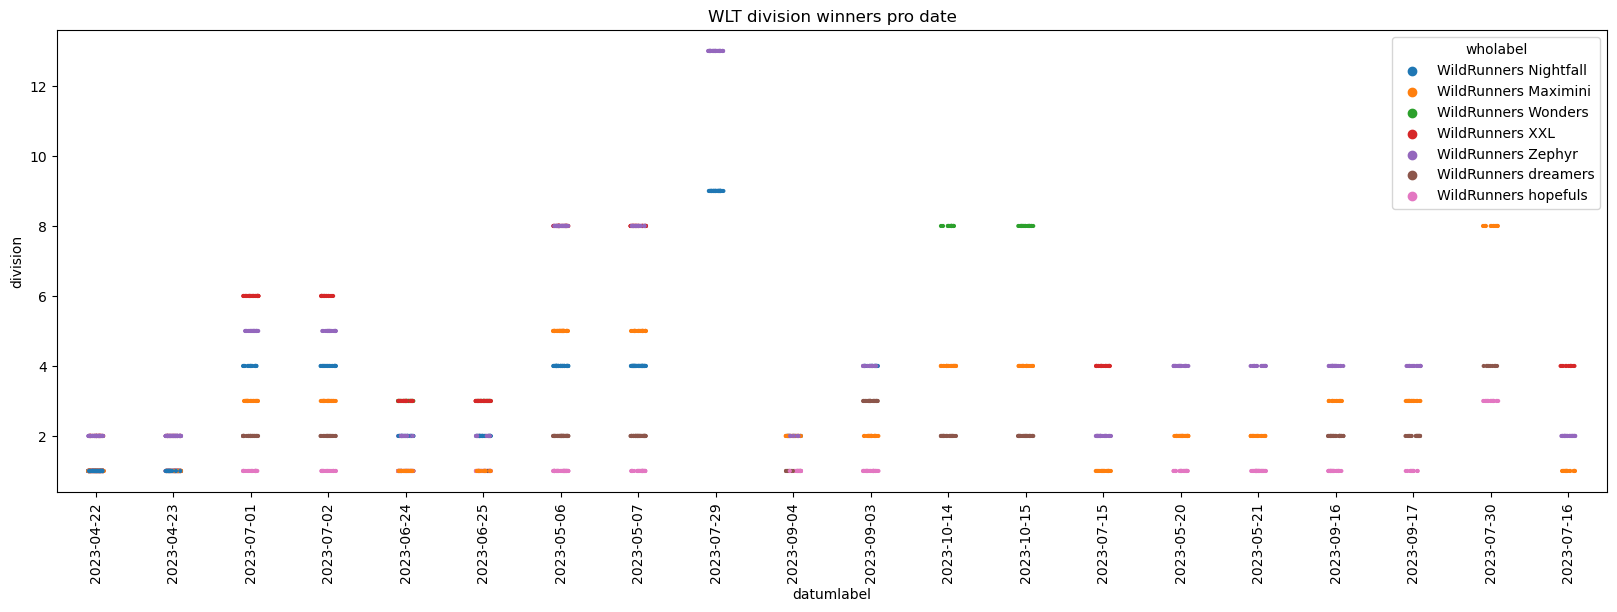

In [525]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.stripplot(data=df, x='datumlabel', y='division', hue='wholabel', size=3)
plt.title('WLT division winners pro date')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


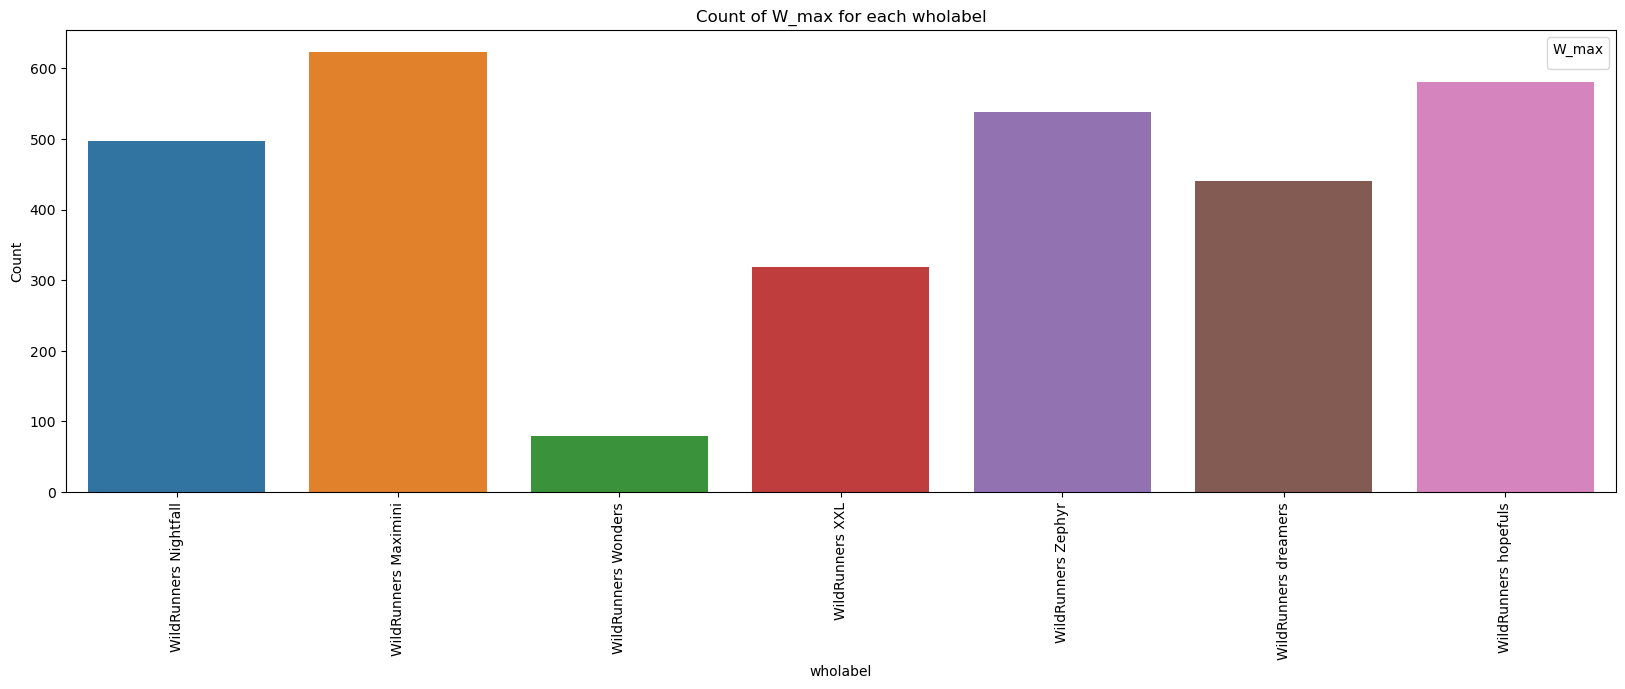

In [526]:
counts = df.groupby(['wholabel', 'W_max']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
# Plot the counts
sns.countplot(data=df, x='wholabel')
plt.xlabel('wholabel')
plt.ylabel('Count')
plt.title('Count of W_max for each wholabel')
plt.legend(title='W_max')
plt.xticks(rotation=90)
plt.show()

C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\2963869100.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='wholabel', y='W_max', hue='division', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)


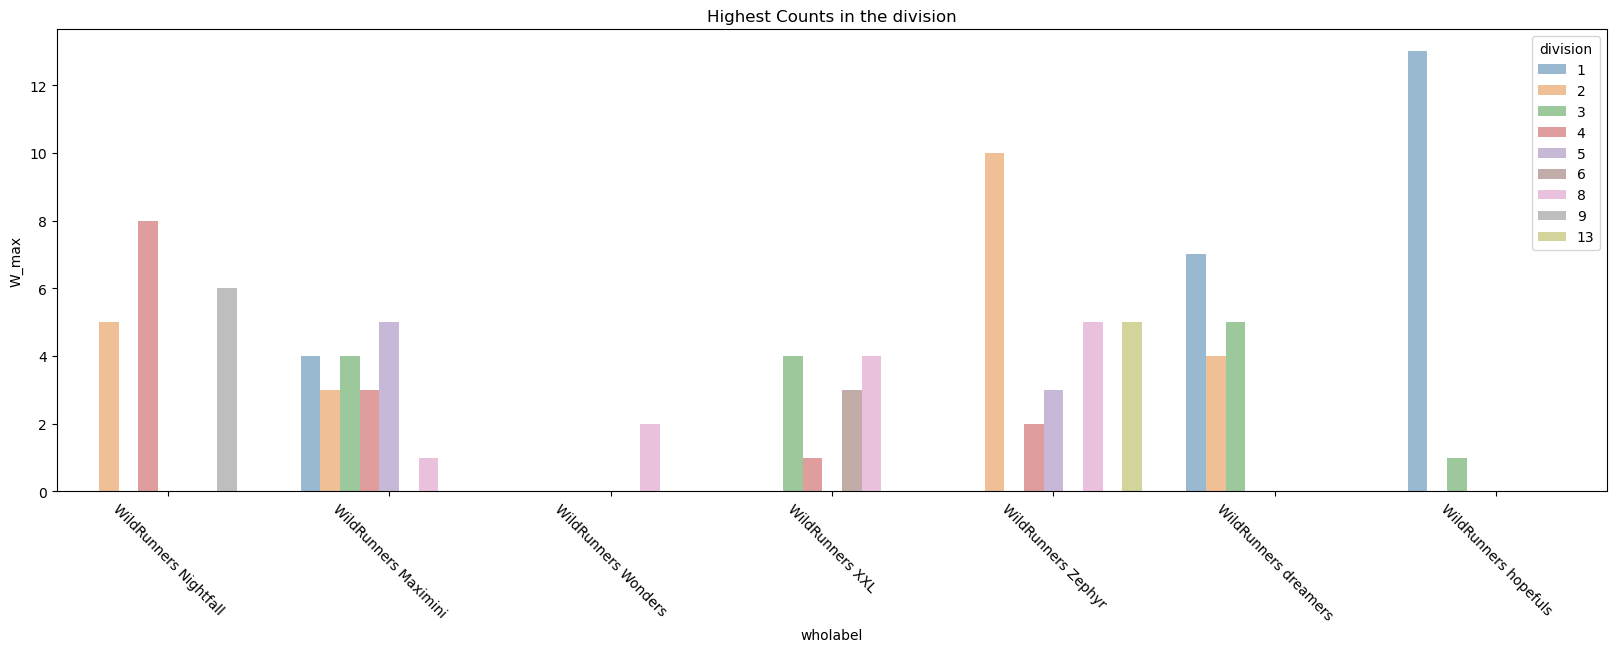

In [527]:
counts = df.groupby(['wholabel']).max().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='wholabel', y='W_max', hue='division', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)
plt.xlabel('wholabel')
plt.ylabel('W_max')
plt.title('Highest Counts in the division')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

In [528]:
udf = df.groupby(['datumlabel', 'wholabel', 'division'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
s_df = f_df.sort_values(by=['division', 'wholabel','datumlabel','W_max'],ascending=[True, False,False, False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                                           W_max
datumlabel wholabel              division       
2023-09-17 WildRunners hopefuls  1           1.0
2023-09-16 WildRunners hopefuls  1           3.0
2023-09-04 WildRunners hopefuls  1           2.0
2023-09-03 WildRunners hopefuls  1           4.0
2023-07-02 WildRunners hopefuls  1           3.0
2023-07-01 WildRunners hopefuls  1           3.0
2023-06-24 WildRunners hopefuls  1           3.0
2023-05-21 WildRunners hopefuls  1           4.0
2023-05-20 WildRunners hopefuls  1           2.0
2023-05-07 WildRunners hopefuls  1           2.0
2023-05-06 WildRunners hopefuls  1           5.0
2023-04-23 WildRunners hopefuls  1          13.0
2023-04-22 WildRunners dreamers  1           7.0
2023-07-16 WildRunners Maximini  1           2.0
2023-07-15 WildRunners Maximini  1           4.0
2023-06-25 WildRunners Maximini  1           4.0
2023-06-24 WildRunners Maximini  1           3.0
2023-10-15 WildRunners dreamers  2           4.0
2023-10-14 WildRunne

__az idényben szerzett pontszámok összegei divizióként__

In [529]:
udf = df.groupby(['datumlabel', 'wholabel', 'division'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
tdf = f_df.groupby([ 'wholabel', 'division'])[['W_max']].sum()
s_df = tdf.sort_values(by=['wholabel', 'W_max','division'],ascending=[True,False,False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                                W_max
wholabel              division       
WildRunners Maximini  1          13.0
                      3          10.0
                      2          10.0
                      5           7.0
                      4           6.0
                      8           1.0
WildRunners Nightfall 4          22.0
                      2           9.0
                      9           6.0
WildRunners Wonders   8           3.0
WildRunners XXL       3           8.0
                      6           5.0
                      8           4.0
                      4           2.0
WildRunners Zephyr    2          28.0
                      4           7.0
                      5           6.0
                      13          5.0
                      8           5.0
WildRunners dreamers  2          24.0
                      1           7.0
                      3           5.0
WildRunners hopefuls  1          45.0
                      3           1.0


__az idényben szerzett pontszámok összegei csapatonként__

In [530]:
udf = df.groupby(['datumlabel', 'wholabel'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
tdf = f_df.groupby([ 'wholabel'])[['W_max']].sum()
s_df = tdf.sort_values(by=['W_max'],ascending=[False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                       W_max
wholabel                    
WildRunners Zephyr      51.0
WildRunners Maximini    47.0
WildRunners hopefuls    46.0
WildRunners Nightfall   37.0
WildRunners dreamers    36.0
WildRunners XXL         19.0
WildRunners Wonders      3.0


__az idényben megnyert versenyek száma csapatonként, diviziónként__

In [531]:
udf = df.groupby(['datumlabel', 'wholabel', 'division'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
tdf = f_df.groupby([ 'wholabel', 'division'])[['W_max']].count()
s_df = tdf.sort_values(by=['wholabel', 'W_max','division'],ascending=[True,False,False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                                W_max
wholabel              division       
WildRunners Maximini  3             4
                      2             4
                      1             4
                      5             2
                      4             2
                      8             1
WildRunners Nightfall 4             5
                      2             2
                      9             1
WildRunners Wonders   8             2
WildRunners XXL       6             2
                      4             2
                      3             2
                      8             1
WildRunners Zephyr    2             5
                      4             4
                      5             2
                      13            1
                      8             1
WildRunners dreamers  2             8
                      3             1
                      1             1
WildRunners hopefuls  1            12
                      3             1


__az idényben megnyert versenyek száma csapatonként__

In [532]:
udf = df.groupby(['datumlabel', 'wholabel', 'division'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
tdf = f_df.groupby([ 'wholabel', 'division'])[['W_max']].count()
vdf = tdf.groupby([ 'wholabel'])[['W_max']].sum()
s_df = vdf.sort_values(by=['W_max'],ascending=[False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                       W_max
wholabel                    
WildRunners Maximini      17
WildRunners Zephyr        13
WildRunners hopefuls      13
WildRunners dreamers      10
WildRunners Nightfall      8
WildRunners XXL            7
WildRunners Wonders        2


__Az összes divizióban szerzett pontszámok összegei__

In [533]:
udf = df.groupby(['datumlabel', 'wholabel', 'division'])[['W_max']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_max'] > 0, axis=1)]
tdf = f_df.groupby([ 'wholabel'])[['W_max']].sum()
s_df = tdf.sort_values(by=['W_max'],ascending=[False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                       W_max
wholabel                    
WildRunners Zephyr      51.0
WildRunners Maximini    47.0
WildRunners hopefuls    46.0
WildRunners Nightfall   37.0
WildRunners dreamers    36.0
WildRunners XXL         19.0
WildRunners Wonders      3.0


__Kutyák győzelmei versenyenenként__

In [534]:
udf = df.groupby(['datumlabel', 'wholabel','namelabel', 'division'])[['W_count']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_count'] > 0, axis=1)]
s_df = f_df.sort_values(by=['datumlabel','division', 'W_count','wholabel', 'namelabel'],ascending=[True, True,False,False, False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                                                     W_count
datumlabel wholabel              namelabel division         
2023-04-22 WildRunners dreamers  Sunny     1             7.0
                                 Hector    1             7.0
                                 Dixie     1             7.0
                                 Alfie     1             7.0
                                 Alex      1             7.0
           WildRunners hopefuls  Tyna      1             4.0
                                 Moon      1             4.0
                                 Maggie    1             4.0
                                 Enola     1             4.0
           WildRunners Nightfall Sirius    1             4.0
                                 Pax       1             4.0
                                 Fleur     1             4.0
                                 Dexter    1             4.0
                                 Bonnie    1             4.0
           WildRunners M

__A kutyák által diciziónként szerzett pontok összege__

In [535]:
udf = df.groupby(['namelabel', 'division'])[['W_count']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_count'] > 0, axis=1)]
s_df = f_df.sort_values(by=['division', 'W_count','namelabel'],ascending=[ True,False,False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

                    W_count
namelabel division         
Hector    1             8.0
Alfie     1             8.0
Moon      1             5.0
Maggie    1             5.0
Enola     1             5.0
Rocky     1             4.0
Fleur     1             4.0
Dexter    1             4.0
Bruno     1             4.0
Bella     1             4.0
Pax       1             3.0
Kesha     1             3.0
Jessie    1             3.0
Falco     1             3.0
Cookies   1             3.0
Brooke    1             3.0
Bree      1             3.0
Bonnie    1             3.0
Ashley    1             3.0
Negro     2             5.0
Ted       2             4.0
Sara      2             4.0
Nina      2             4.0
Mason     2             4.0
Kesha     2             4.0
Hank      2             4.0
Gerry     2             4.0
Fleur     2             4.0
Falco     2             4.0
Dixie     2             4.0
Brix      2             4.0
Bella     2             4.0
Alfie     2             4.0
Abby      2         

__A kutyák által szerzett pontok összege__

In [536]:
udf = df.groupby(['namelabel'])[['W_count']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_count'] > 0, axis=1)]
s_df = f_df.sort_values(by=['W_count','namelabel'],ascending=[False,False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s_df)

           W_count
namelabel         
Hector         8.0
Alfie          8.0
Henry          6.0
Them           5.0
Riley          5.0
Negro          5.0
Moon           5.0
Maggie         5.0
Enola          5.0
Ted            4.0
Speedy         4.0
Scotty         4.0
Sara           4.0
Rocky          4.0
Nina           4.0
Mason          4.0
Hank           4.0
Gerry          4.0
Fleur          4.0
Dexter         4.0
Bruno          4.0
Brix           4.0
Bella          4.0
Abby           4.0
Pax            3.0
Kesha          3.0
Jessie         3.0
Jasper         3.0
Gordon         3.0
Falco          3.0
Dusty          3.0
Cookies        3.0
Brooke         3.0
Bree           3.0
Bonnie         3.0
Bailey         3.0
Ashley         3.0
Angie          3.0
Agnes          3.0
Punk           2.0
Kent           2.0
Easy           2.0
Rex            1.0
Milo           1.0


__A kutyák egyéni fejlődése__

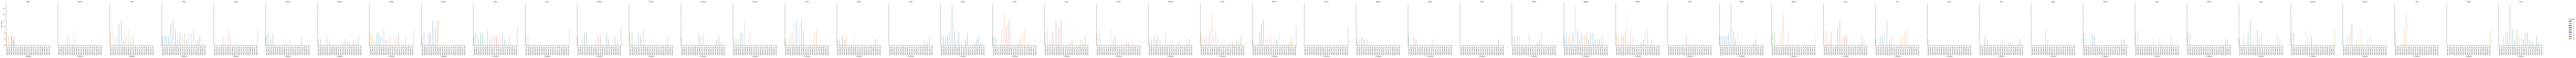

In [537]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for hue values
custom_colors = {"division1": "blue", "division2": "green", "division3": "red",
                 "division4": "blue", "division5": "green", "division6": "red",
                 "division7": "blue", "division8": "green", "division9": "red",
                 "division10": "blue", "division11": "green", "division12": "red",
                 "division13": "green", "division14": "red"}

udf = df.groupby(['datumlabel', 'namelabel', 'division'])[['W_count']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_count'] > 0, axis=1)]
s_df = f_df.sort_values(by=['namelabel','datumlabel','division', 'W_count'],ascending=[True, True,False,False])
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(s_df)

df_r = s_df.reset_index()
#g = sns.catplot(x='datumlabel', y=("W_count"), hue=("division"), col="namelabel", data=df_r, 
#                kind='point', palette=custom_colors)
g = sns.catplot(x='datumlabel', y=("W_count"), hue=("division"), col="namelabel", data=df_r, 
                kind='bar')

# Customize plot if needed
g.set_axis_labels("X datum", "Y W_count")

g.set_titles("{col_name}")
# Rotate x-axis labels for every subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
# Show plot
plt.show()



<Figure size 2000x600 with 0 Axes>

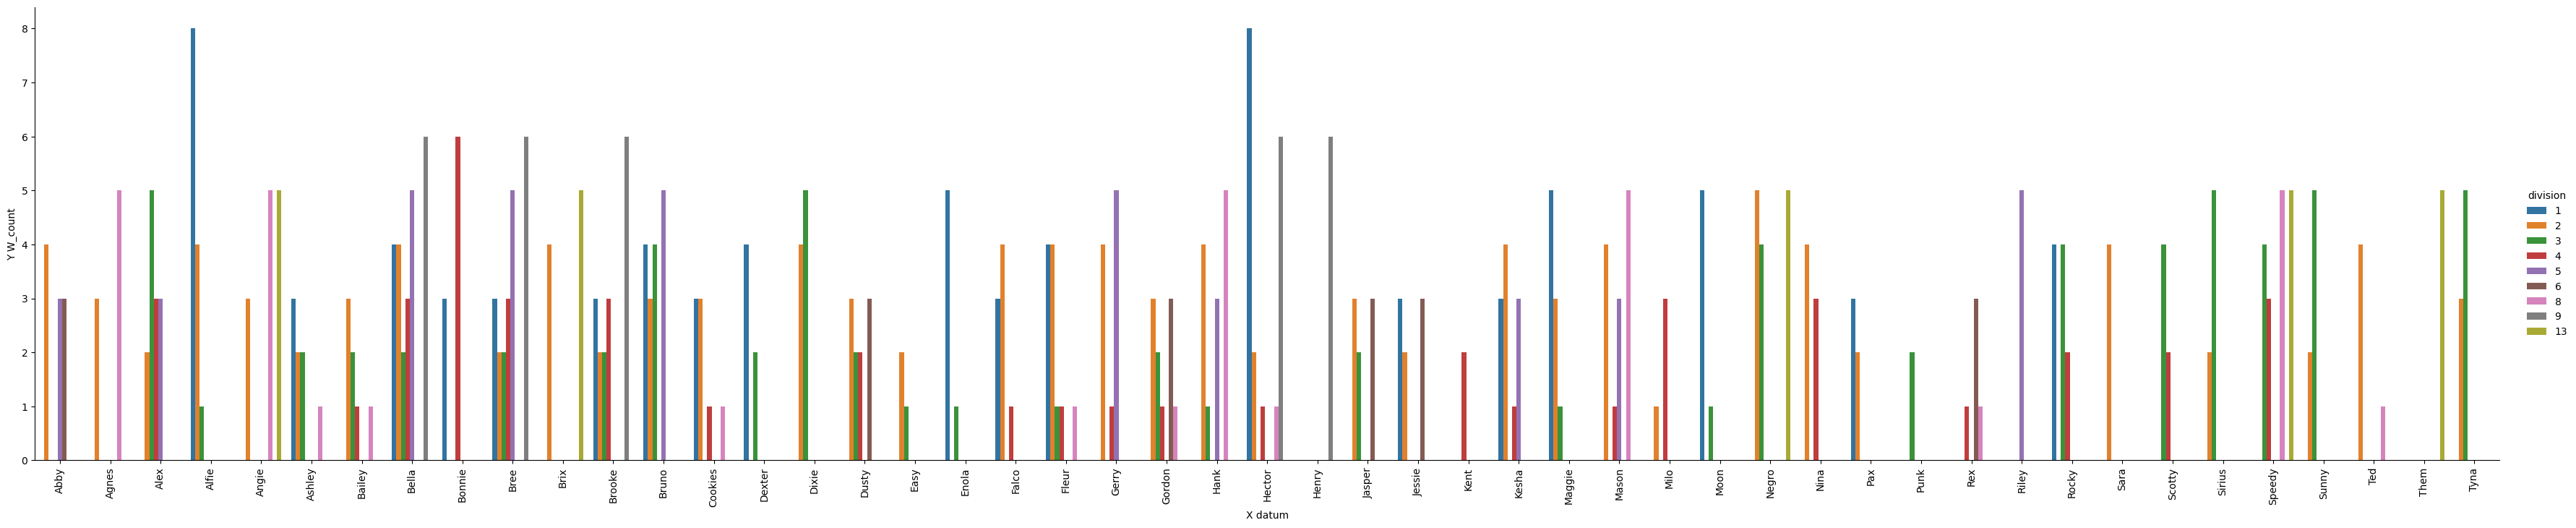

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for hue values
custom_colors = {"division1": "blue", "division2": "green", "division3": "red",
                 "division4": "blue", "division5": "green", "division6": "red",
                 "division7": "blue", "division8": "green", "division9": "red",
                 "division10": "blue", "division11": "green", "division12": "red",
                 "division13": "green", "division14": "red"}

udf = df.groupby([ 'namelabel','division'])[['W_count']].agg('first')
f_df = udf[udf.apply(lambda row: row['W_count'] > 0, axis=1)]
s_df = f_df.sort_values(by=['namelabel','division', 'W_count'],ascending=[True,False,False])
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(s_df)

df_r = s_df.reset_index()
plt.figure(figsize=(20, 6))
#g = sns.catplot(x='datumlabel', y=("W_count"), hue=("division"), col="namelabel", data=df_r, 
#                kind='point', palette=custom_colors)
g = sns.catplot(x='namelabel', y=("W_count"), hue=("division"), data=df_r, 
                kind='bar',height=7, aspect=5)
g.set_axis_labels("X datum", "Y W_count")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
plt.show()


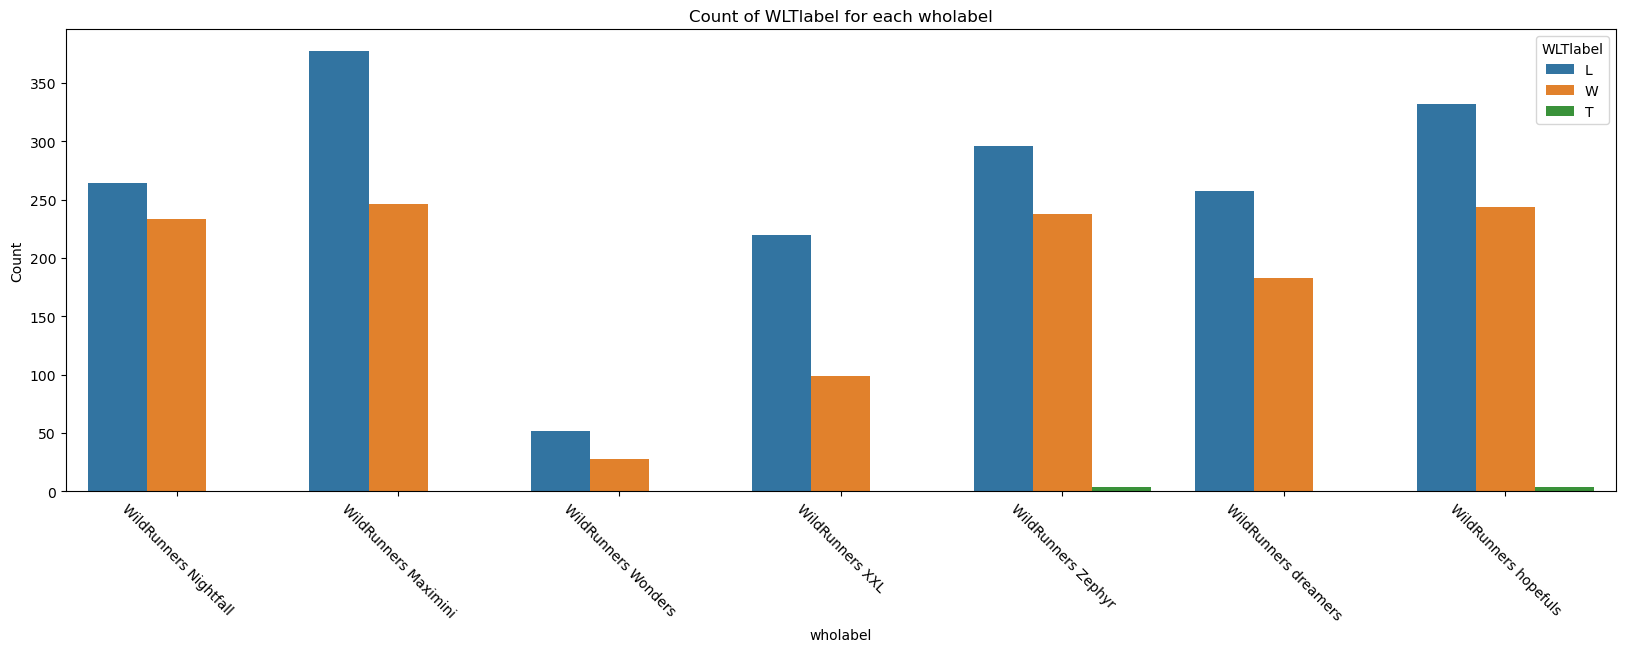

In [539]:
counts = df.groupby(['wholabel', 'WLTlabel']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
# Plot the counts
sns.countplot(data=df, x='wholabel', hue='WLTlabel')
plt.xlabel('wholabel')
plt.ylabel('Count')
plt.title('Count of WLTlabel for each wholabel')
plt.legend(title='WLTlabel')
plt.xticks(rotation=-45)
plt.show()





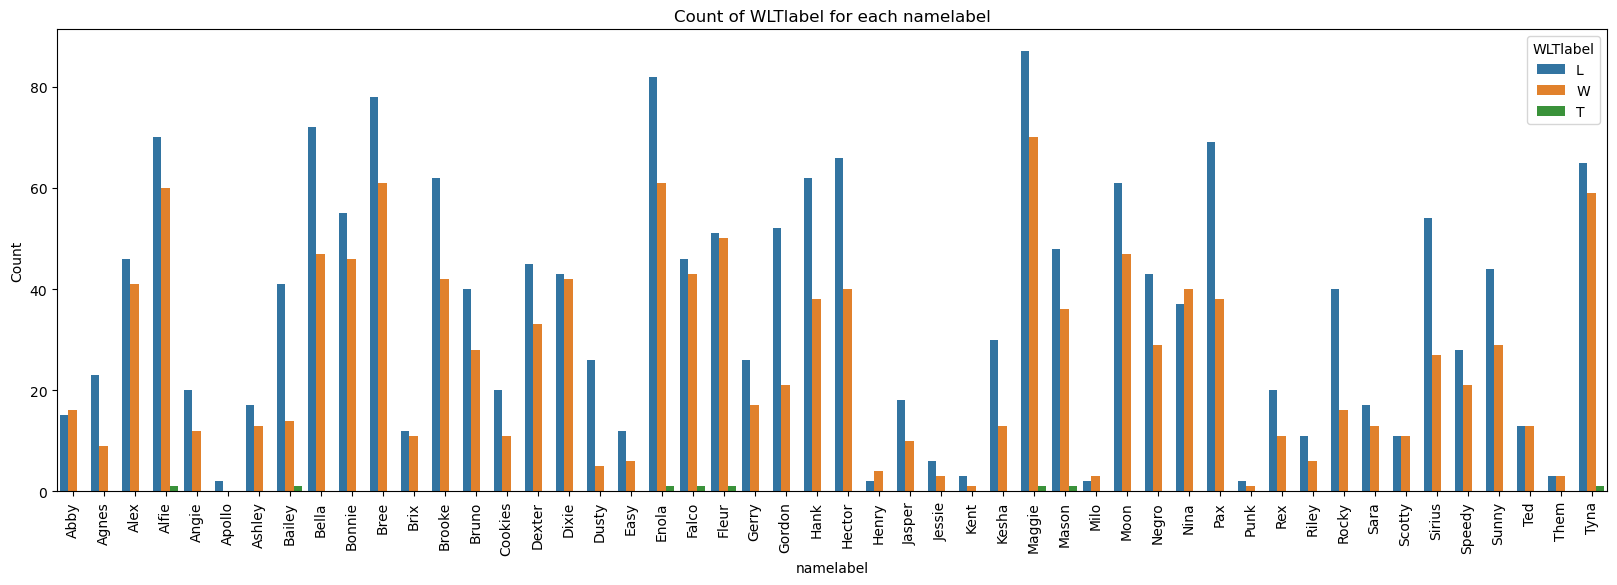

In [540]:
# Plot the counts
plt.figure(figsize=(20, 6))  # Adjust the width as needed
#sns.countplot(data=df, x='namelabel', hue='WLTlabel')
sns.countplot(data=df, x='namelabel', hue='WLTlabel', order=sorted(df['namelabel'].unique()))
plt.xlabel('namelabel')
plt.ylabel('Count')
plt.title('Count of WLTlabel for each namelabel')
plt.legend(title='WLTlabel')
plt.xticks(rotation=90)
plt.show()

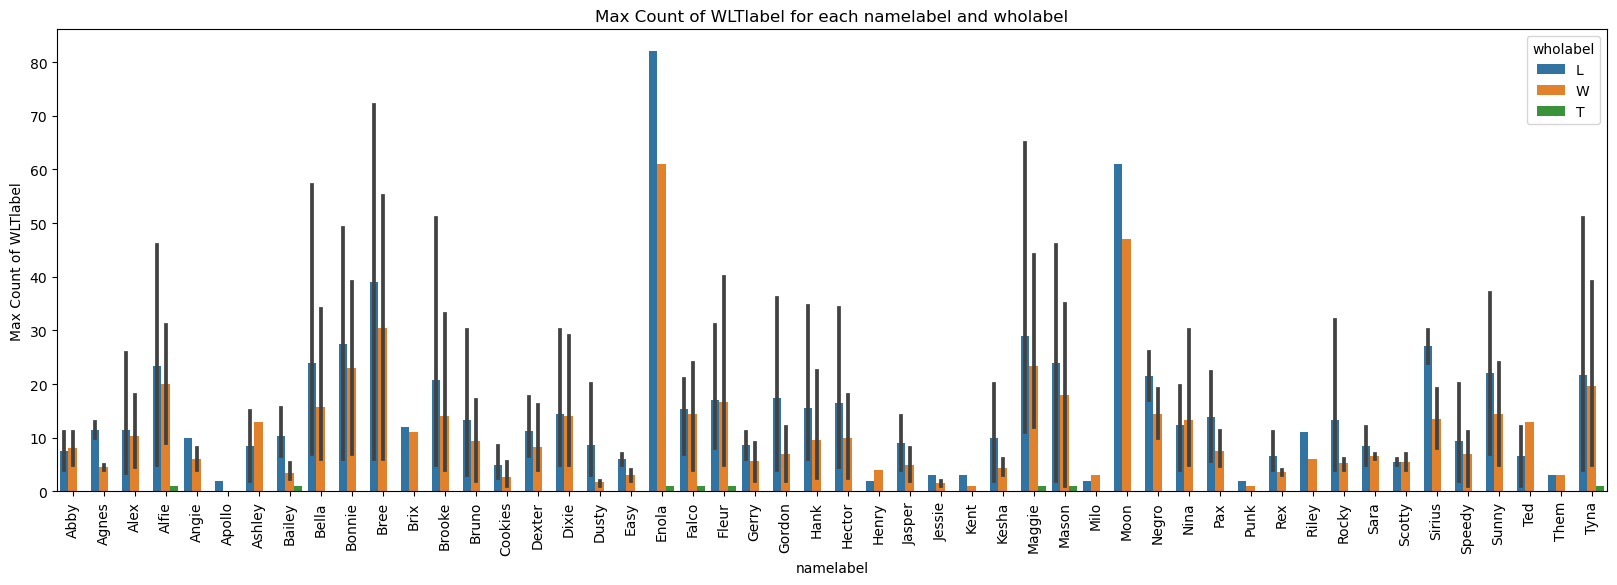

In [541]:
# Preprocess the data to obtain counts for each combination of namelabel, WLTlabel, and wholabel
counts_df = df.groupby(['namelabel', 'wholabel', 'WLTlabel']).size().reset_index(name='count')

# Find the maximal count of WLTlabel for each unique combination of namelabel and wholabel
max_counts_df = counts_df.groupby(['namelabel', 'wholabel','WLTlabel'])['count'].max().reset_index()

# Plot the results
plt.figure(figsize=(20, 6))
sns.barplot(data=max_counts_df, x='namelabel', y='count', hue='WLTlabel', order=sorted(df['namelabel'].unique()))
plt.xlabel('namelabel')
plt.ylabel('Max Count of WLTlabel')
plt.title('Max Count of WLTlabel for each namelabel and wholabel')
plt.xticks(rotation=90)
plt.legend(title='wholabel')
plt.show()

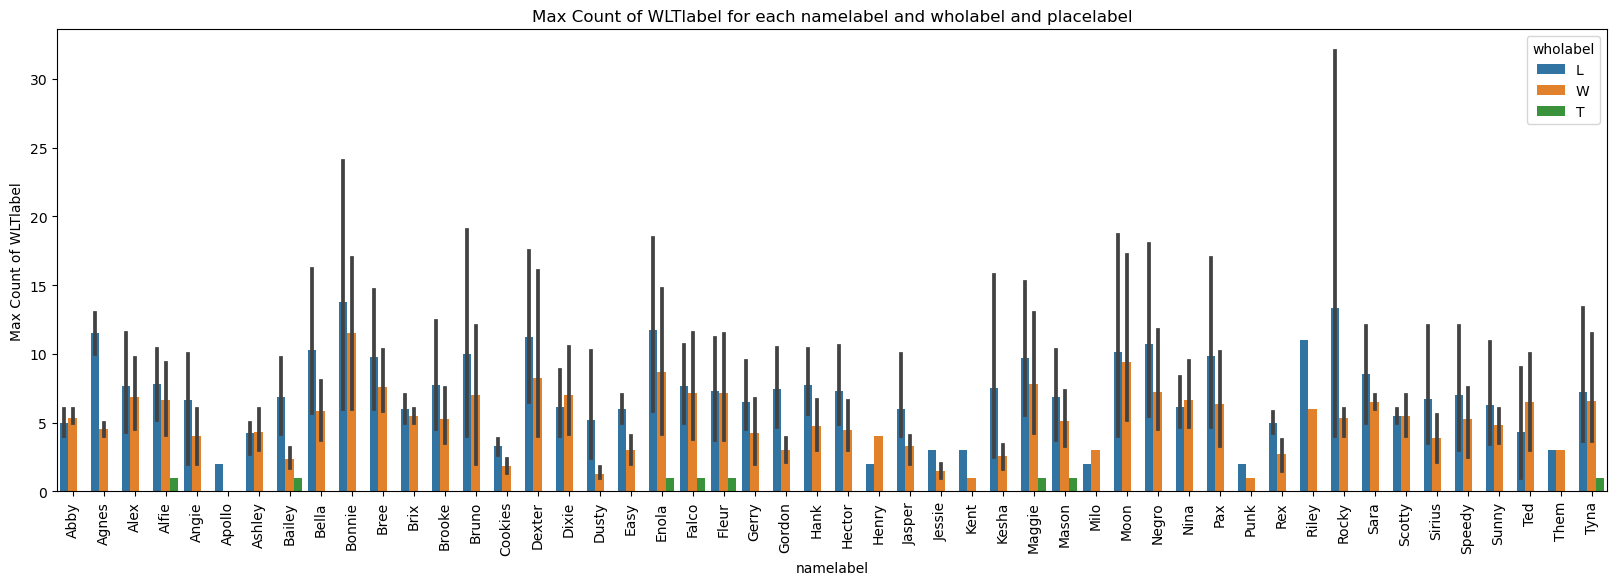

In [542]:
# Preprocess the data to obtain counts for each combination of namelabel, WLTlabel, and wholabel
counts_df = df.groupby(['namelabel', 'wholabel', 'placelabel', 'WLTlabel']).size().reset_index(name='count')

# Find the maximal count of WLTlabel for each unique combination of namelabel and wholabel
max_counts_df = counts_df.groupby(['namelabel', 'wholabel','placelabel','WLTlabel'])['count'].max().reset_index()

# Plot the results
plt.figure(figsize=(20, 6))
sns.barplot(data=max_counts_df, x='namelabel', y='count', hue='WLTlabel', order=sorted(df['namelabel'].unique()))
plt.xlabel('namelabel')
plt.ylabel('Max Count of WLTlabel')
plt.title('Max Count of WLTlabel for each namelabel and wholabel and placelabel')
plt.xticks(rotation=90)
plt.legend(title='wholabel')
plt.show()

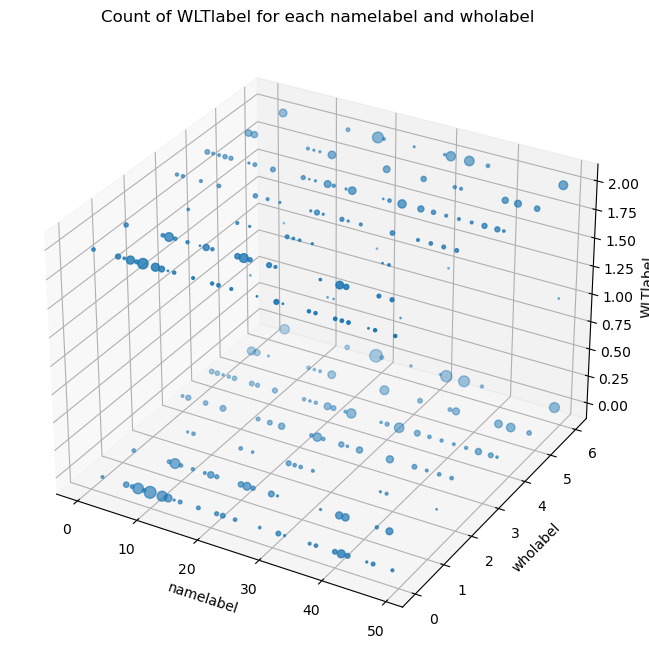

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel', 51: 'Category'}
{12: 'W', 14: 'WSW', 13: 'WNW', 6: 'NW', 5: 'NNW', 2: 'N', 4: 'NNE', 1: 'ESE', 3: 'NE', 0: 'E', 9: 'SSE', 8: 'SE', 11: 'SW', 7: 'S', 10: 'SSW'}
{0: 'L', 2: 'W', 1: 'T'}
{1: 'ivarta

In [543]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Preprocess the data to obtain counts for each combination of namelabel, WLTlabel, and wholabel
counts_df = df.groupby(['name', 'WLT', 'who']).size().reset_index(name='count')

# Plot the 3D plane plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(counts_df['name'], counts_df['who'], counts_df['WLT'], s=counts_df['count'])

# Set labels and title
ax.set_xlabel('namelabel')
ax.set_ylabel('wholabel')
ax.set_zlabel('WLTlabel')
ax.set_title('Count of WLTlabel for each namelabel and wholabel')

plt.show()
#{2: 'W', 0: 'L', 1: 'T'}

#{2: 'WildRunners Wonders', 0: 'WildRunners Maximini', 3: 'WildRunners XXL', 1: 'WildRunners Nightfall', 
# 4: 'WildRunners Zephyr', 5: 'WildRunners dreamers', 6: 'WildRunners hopefuls'}

#{15: 'Dexter', 27: 'Jasper', 4: 'Angie', 2: 'Alex', 6: 'Ashley', 8: 'Bella', 23: 'Gordon', 35: 'Negro', 1: 'Agnes',
# 45: 'Speedy', 5: 'Apollo', 40: 'Riley', 28: 'Jessie', 47: 'Ted', 22: 'Gerry', 26: 'Henry', 7: 'Bailey', 19: 'Enola', 
# 38: 'Punk', 42: 'Sara', 37: 'Pax', 39: 'Rex', 17: 'Dusty', 21: 'Fleur', 13: 'Bruno', 3: 'Alfie', 25: 'Hector',
# 31: 'Maggie', 48: 'Them', 41: 'Rocky', 16: 'Dixie', 11: 'Brix', 33: 'Milo', 49: 'Tyna', 0: 'Abby', 18: 'Easy',
# 20: 'Falco', 46: 'Sunny', 36: 'Nina', 30: 'Kesha', 32: 'Mason', 34: 'Moon', 44: 'Sirius', 43: 'Scotty', 14: 'Cookies',
# 10: 'Bree', 29: 'Kent', 12: 'Brooke', 9: 'Bonnie', 24: 'Hank'}
#print("Column names:", df.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)

code_label_dict = dict(zip(df['wind_dir'], df['wind_dirlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['WLT'], df['WLTlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['ivar'], df['ivarlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['place'], df['placelabel']))
print(code_label_dict)
#code_label_dict = dict(zip(df['chip_szam'], df['chip_szamlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(df['name'], df['namelabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['who'], df['wholabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['colour'], df['colourlabel']))
print(code_label_dict)

C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\2090349507.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: mean(x) if len(x) > 0 else 0, alpha=0.5)


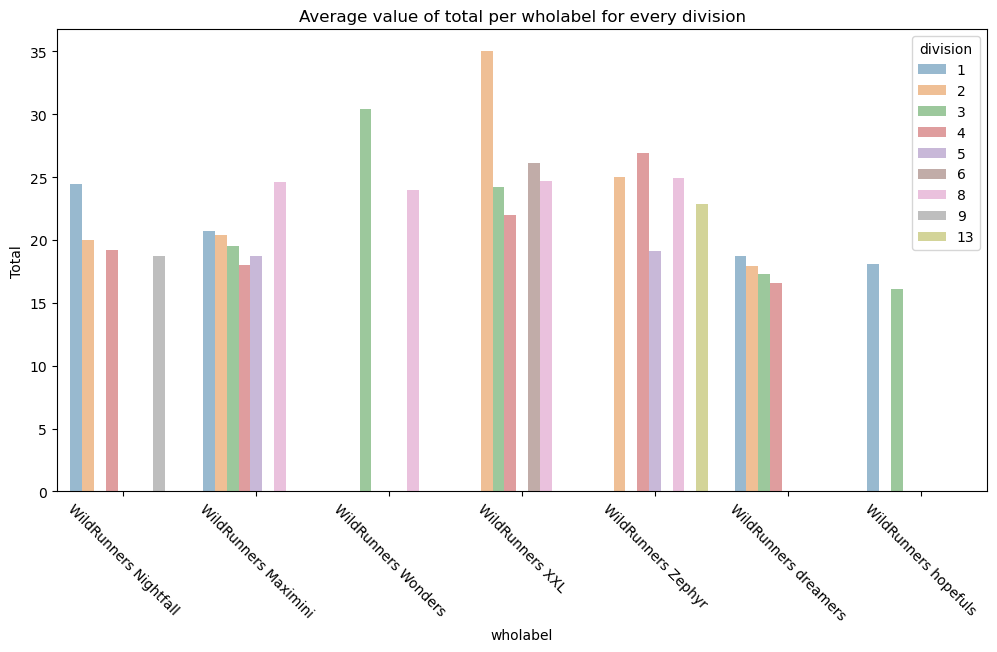

In [544]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: mean(x) if len(x) > 0 else 0, alpha=0.5)
plt.xlabel('wholabel')
plt.ylabel('Total')
plt.title('Average value of total per wholabel for every division')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\1810232570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: min(x) if len(x) > 0 else 0)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\1810232570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)


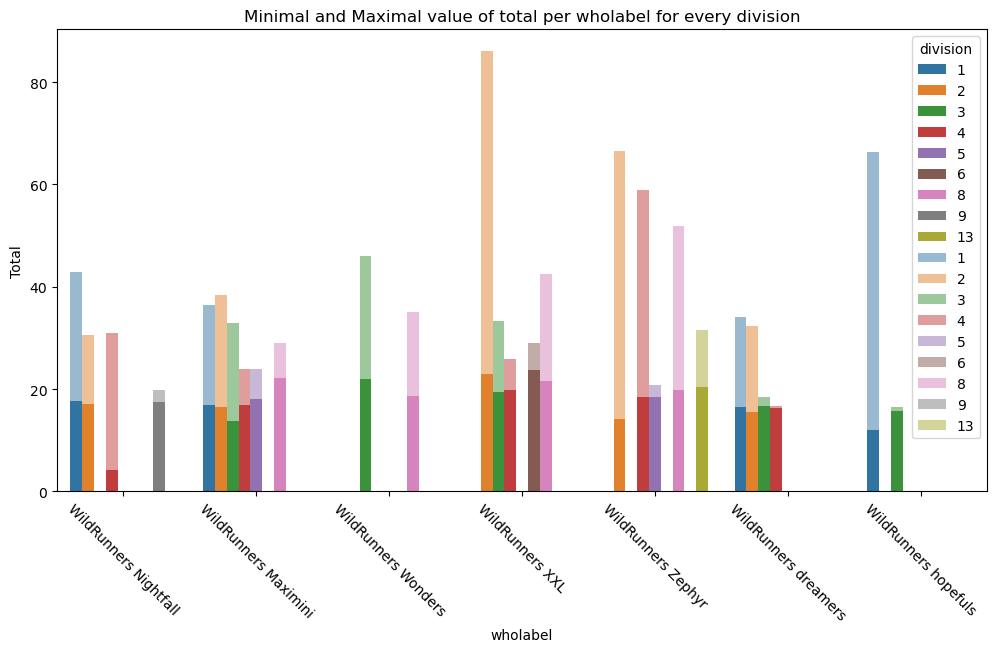

In [545]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: min(x) if len(x) > 0 else 0)
sns.barplot(data=df, x='wholabel', y='total', hue='division', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)
plt.xlabel('wholabel')
plt.ylabel('Total')
plt.title('Minimal and Maximal value of total per wholabel for every division')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\3718767805.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='division', y='total', hue='wholabel', ci=None, estimator=lambda x: min(x) if len(x) > 0 else 0)
C:\Users\zertr\AppData\Local\Temp\ipykernel_13700\3718767805.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='division', y='total', hue='wholabel', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)


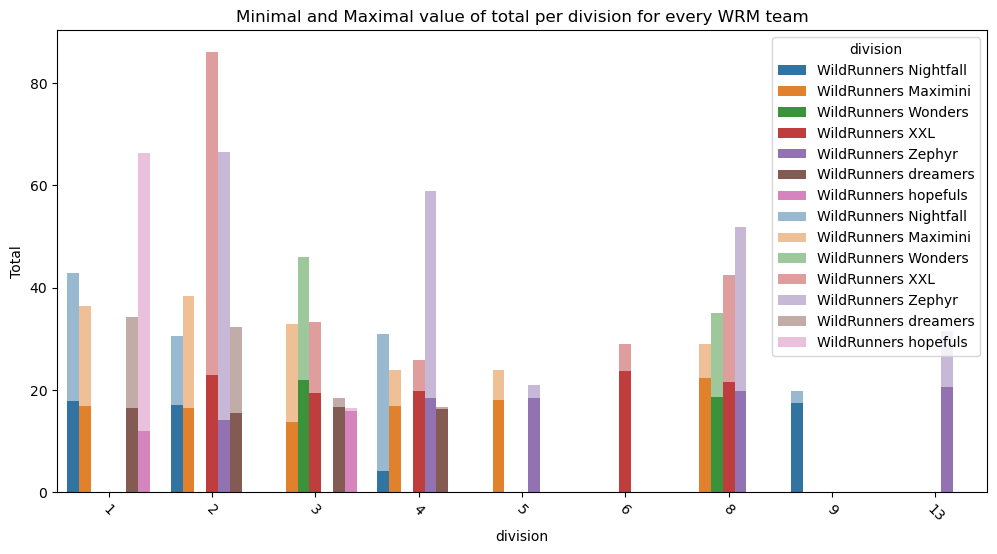

In [546]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='division', y='total', hue='wholabel', ci=None, estimator=lambda x: min(x) if len(x) > 0 else 0)
sns.barplot(data=df, x='division', y='total', hue='wholabel', ci=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.5)
plt.xlabel('division')
plt.ylabel('Total')
plt.title('Minimal and Maximal value of total per division for every WRM team')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

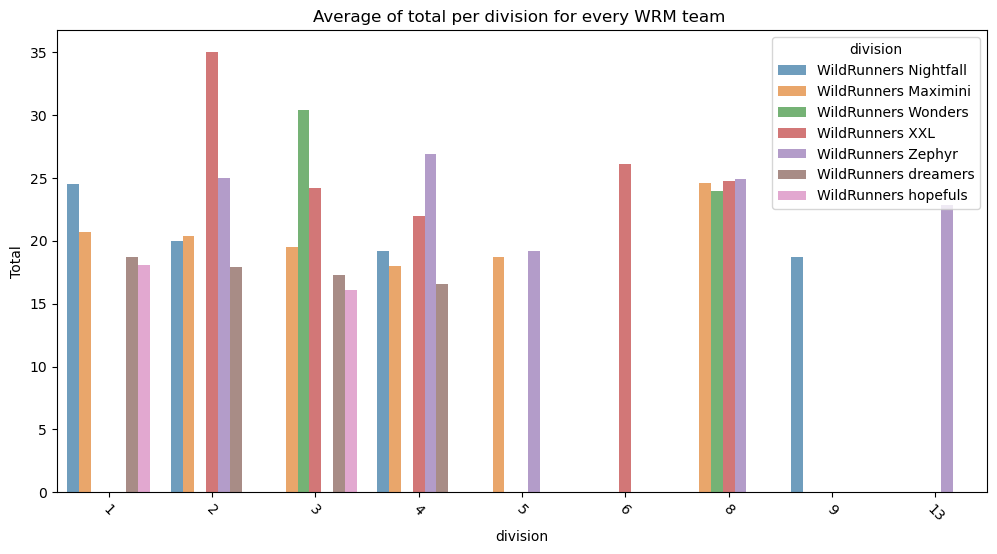

In [547]:
# Plot the minimal and maximal value of the total column per division for every wholabel
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='division', y='total', hue='wholabel', errorbar=None, estimator=lambda x: mean(x) if len(x) > 0 else 0, alpha=0.7)

plt.xlabel('division')
plt.ylabel('Total')
plt.title('Average of total per division for every WRM team ')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()




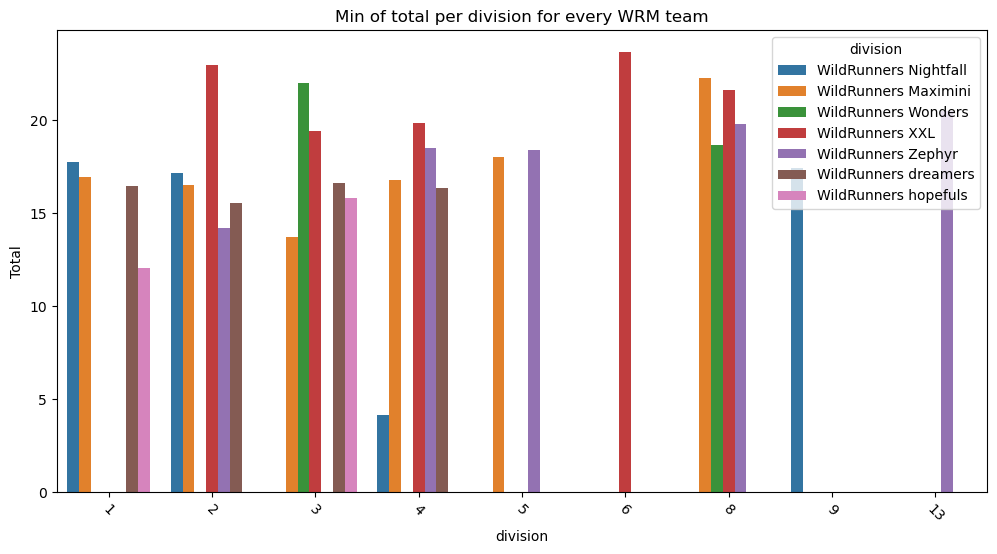

In [548]:
# Plot the minimal and maximal value of the total column per division for every wholabel
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='division', y='total', hue='wholabel', errorbar=None, estimator=lambda x: min(x) if len(x) > 0 else 0, alpha=1)

plt.xlabel('division')
plt.ylabel('Total')
plt.title('Min of total per division for every WRM team')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

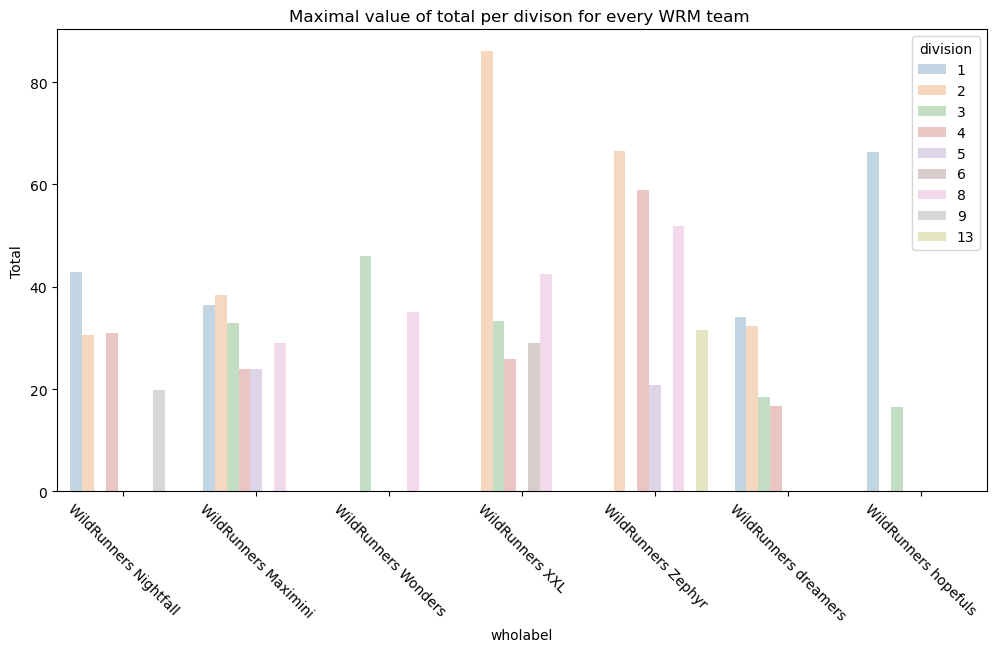

In [549]:
# Plot the minimal and maximal value of the total column per division for every wholabel
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='wholabel', y='total', hue='division', errorbar=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.3)

plt.xlabel('wholabel')
plt.ylabel('Total')
plt.title('Maximal value of total per divison for every WRM team ')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()

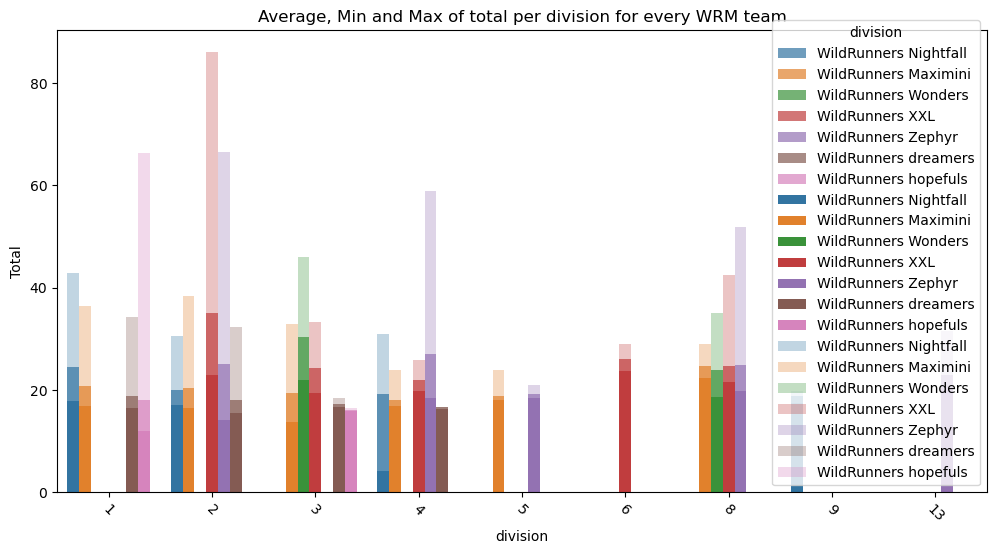

In [550]:
# Plot the minimal and maximal value of the total column per division for every wholabel
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='division', y='total', hue='wholabel', errorbar=None, estimator=lambda x: mean(x) if len(x) > 0 else 0, alpha=0.7)
sns.barplot(data=df, x='division', y='total', hue='wholabel', errorbar=None, estimator=lambda x: min(x) if len(x) > 0 else 0, alpha=1)
sns.barplot(data=df, x='division', y='total', hue='wholabel', errorbar=None, estimator=lambda x: max(x) if len(x) > 0 else 0, alpha=0.3)

plt.xlabel('division')
plt.ylabel('Total')
plt.title('Average, Min and Max of total per division for every WRM team')
plt.legend(title='division')
plt.xticks(rotation=-45)
plt.show()


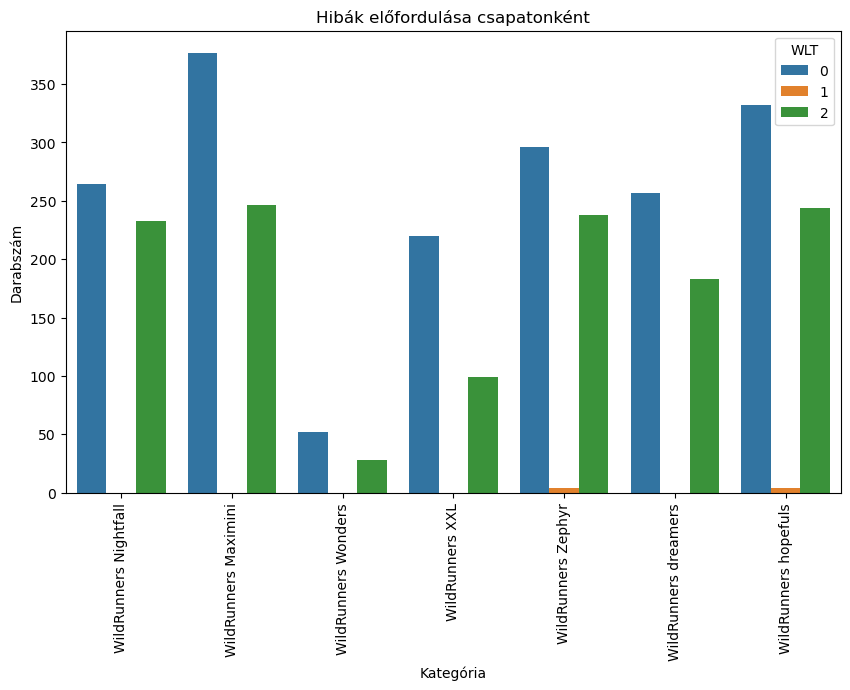

In [551]:
# Hiba előfordulások
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='wholabel', hue='WLT')
plt.title('Hibák előfordulása csapatonként')
plt.xlabel('Kategória')
plt.ylabel('Darabszám')
plt.xticks(rotation=90)
plt.show()

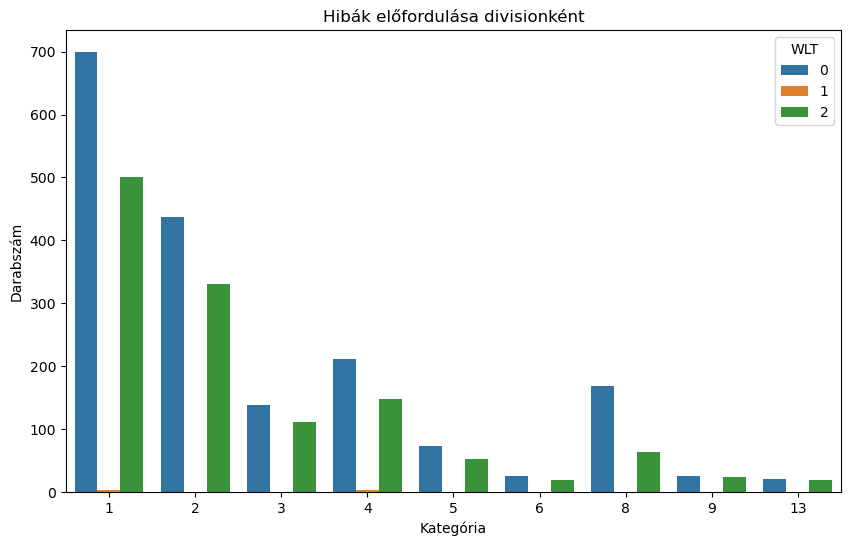

In [552]:
# Hiba előfordulások
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='division', hue='WLT')
plt.title('Hibák előfordulása divisionként')
plt.xlabel('Kategória')
plt.ylabel('Darabszám')
plt.show()

In [553]:
df.to_csv('04.elemzett_joined_versenyadatok.temp1.csv', sep=';', index=False)  